VERİ KÜMESİNİ KEŞFETMEYE YÖNELİK ADIMLAR

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn
!pip install missingno

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import missingno as msno
from sklearn import preprocessing

In [200]:
df = pd.read_excel("side_effect_data 1.xlsx")

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [202]:
df.dtypes

,0
Kullanici_id,int64
Cinsiyet,object
Dogum_Tarihi,datetime64[ns]
Uyruk,object
Il,object
Ilac_Adi,object
Ilac_Baslangic_Tarihi,datetime64[ns]
Ilac_Bitis_Tarihi,datetime64[ns]
Yan_Etki,object
Yan_Etki_Bildirim_Tarihi,datetime64[ns]


In [203]:
df.groupby("Ilac_Adi").count()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
Ilac_Adi,,,,,,,,,,,,,,,,,,
Levomilnacipran,24,16,24,24,24,24,24,24,24,19,22,23,21,24,23,21,23,21
Mometasone furoate,11,7,11,11,8,11,11,11,11,11,8,11,11,11,10,8,8,9
Prednicarbate cream,15,12,15,15,14,15,15,15,15,13,15,14,13,15,14,12,15,14
alprazolam,18,12,18,18,14,18,18,18,18,15,14,15,18,18,17,13,16,18
alprazolam concentrate,11,8,11,11,9,11,11,11,11,7,10,11,10,11,10,9,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
warfarin sodium,14,13,14,14,14,14,14,14,14,12,13,14,14,14,14,13,12,12
zaleplon,18,11,18,18,17,18,18,18,18,14,14,17,15,17,18,17,14,18
ziprasidone,13,7,13,13,12,13,13,13,13,12,9,12,12,13,12,12,10,13


In [204]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
Boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


In [205]:
df.describe(include = "all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,NaN,NaN,NaN,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Cinsiyet,1579,2,Female,872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dogum_Tarihi,2357,NaN,NaN,NaN,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Uyruk,2357,1,Turkiye,2357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Il,2130,13,Adana,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ilac_Adi,2357,151,chlordiazepoxide-amitriptyline,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ilac_Baslangic_Tarihi,2357,NaN,NaN,NaN,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,NaN,NaN,NaN,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki,2357,22,Agizda Farkli Bir Tat,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yan_Etki_Bildirim_Tarihi,2357,NaN,NaN,NaN,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN


In [206]:
df.isnull().values.any()


True

In [207]:
df.isnull().sum()

,0
Kullanici_id,0
Cinsiyet,778
Dogum_Tarihi,0
Uyruk,0
Il,227
Ilac_Adi,0
Ilac_Baslangic_Tarihi,0
Ilac_Bitis_Tarihi,0
Yan_Etki,0
Yan_Etki_Bildirim_Tarihi,0


In [209]:
cat_df = df.drop("Kullanici_id", axis = 1).select_dtypes(include = ["object"])

In [210]:
cat_df["Kan Grubu"].value_counts().count()

8

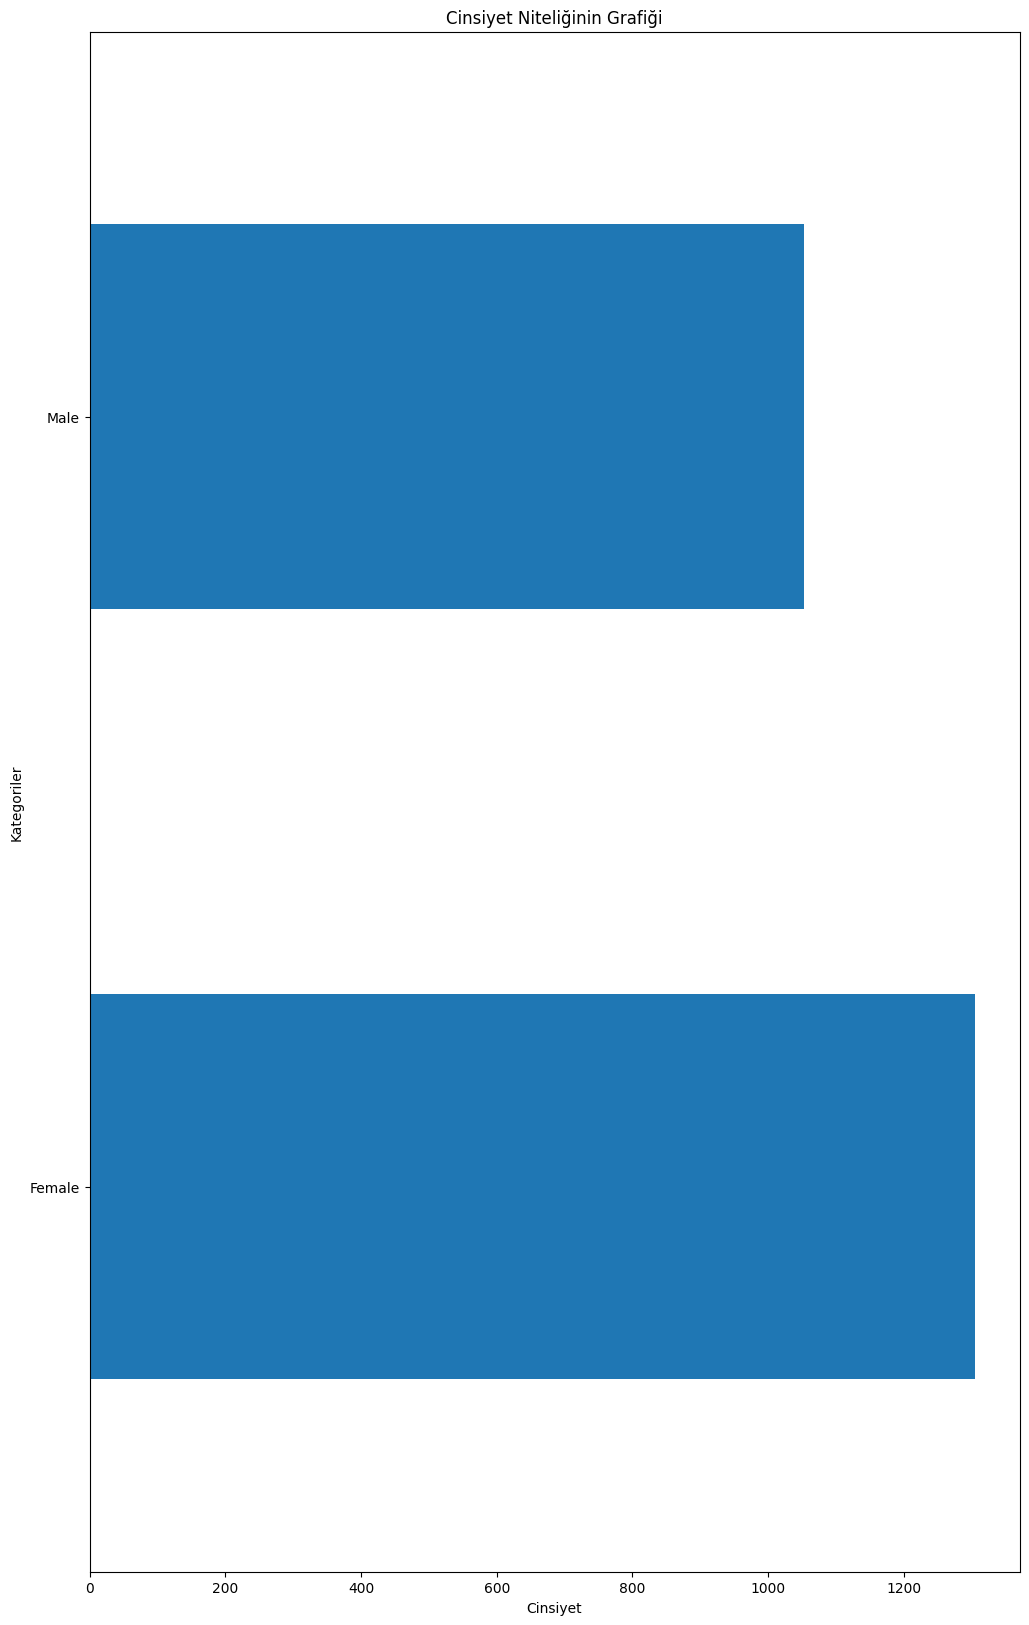

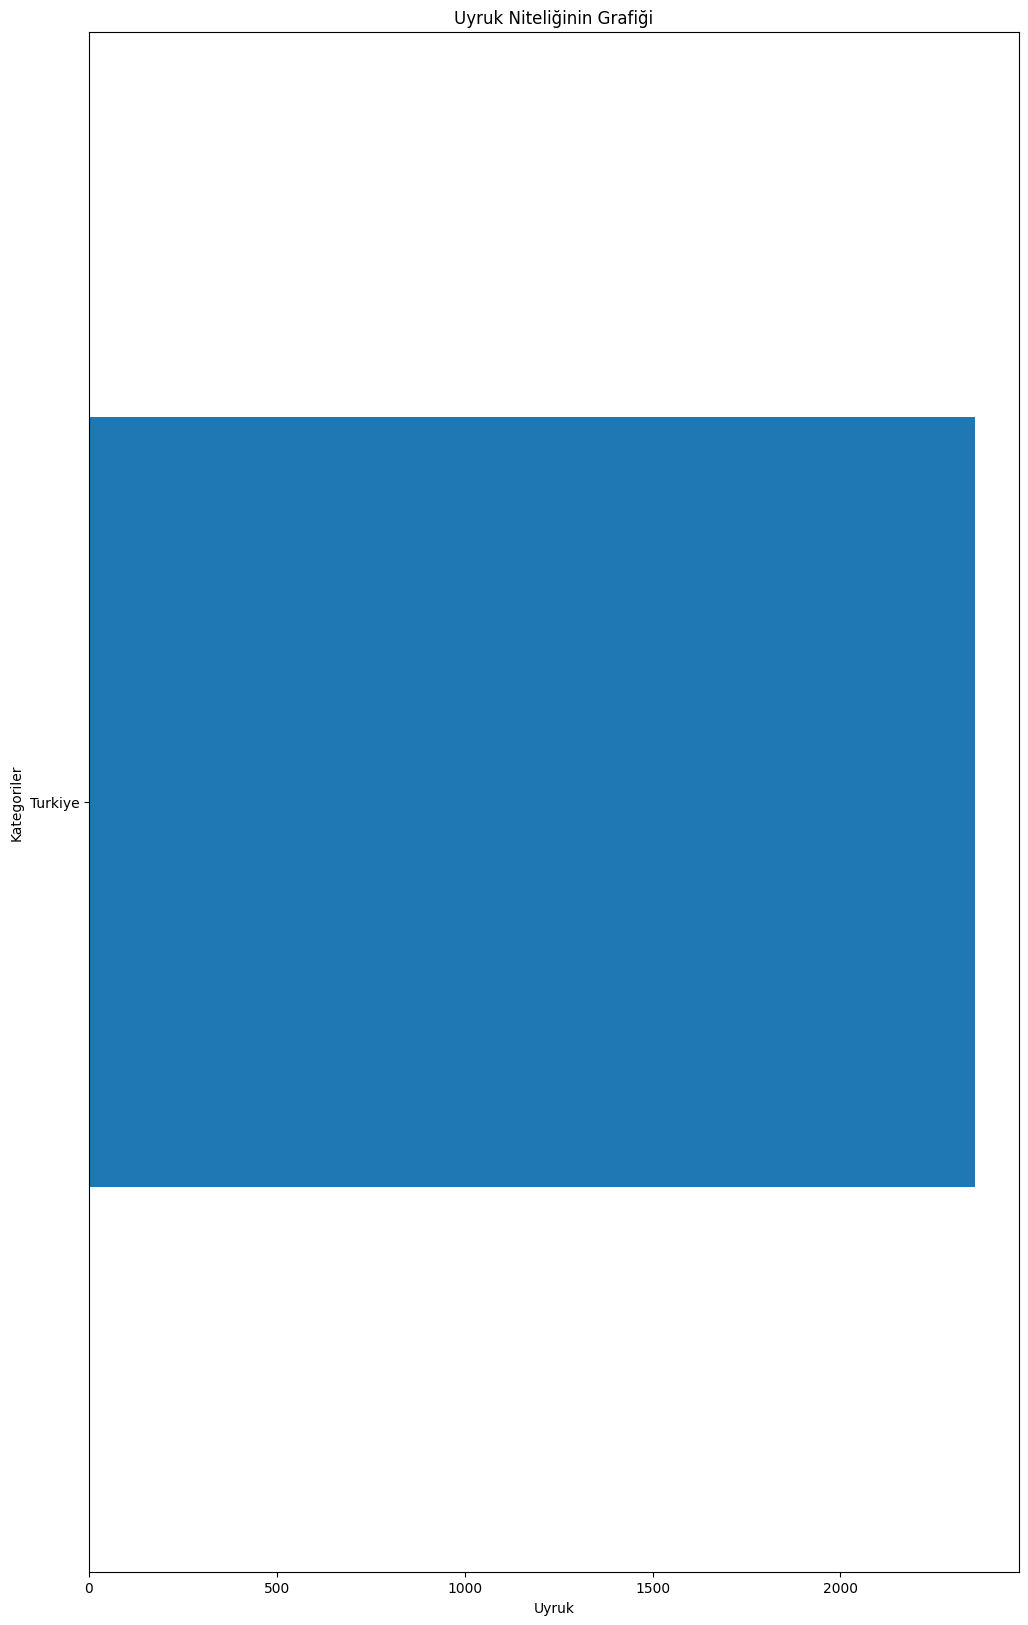

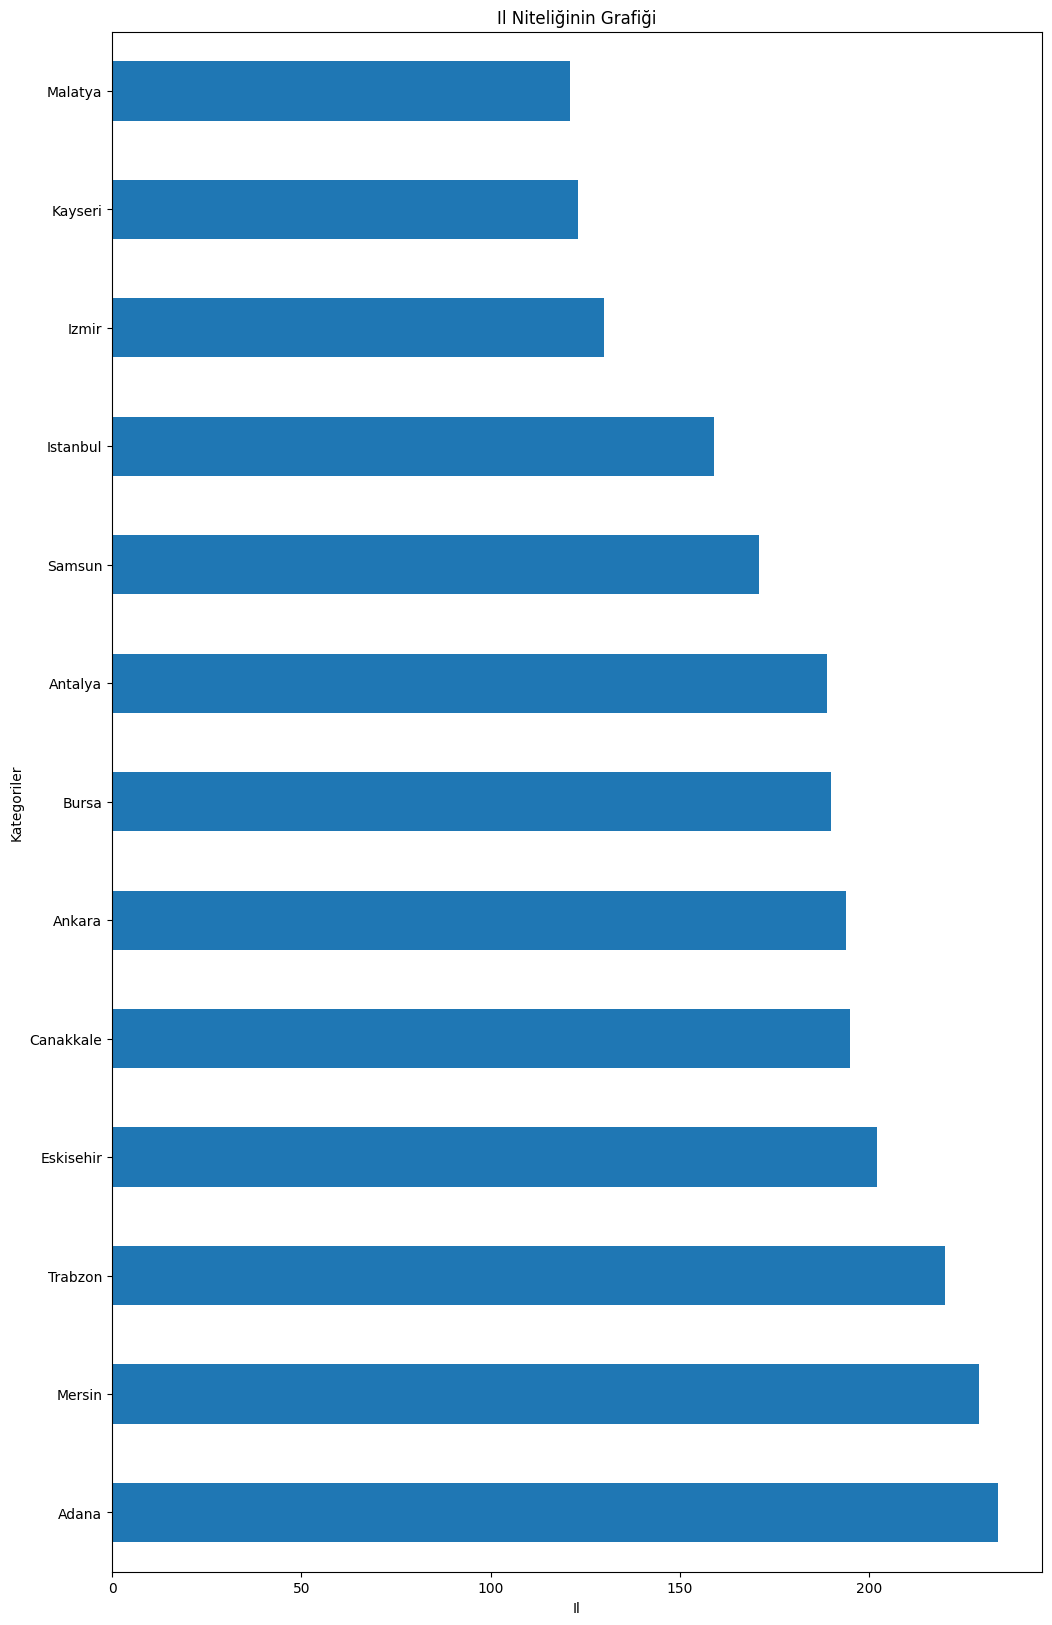

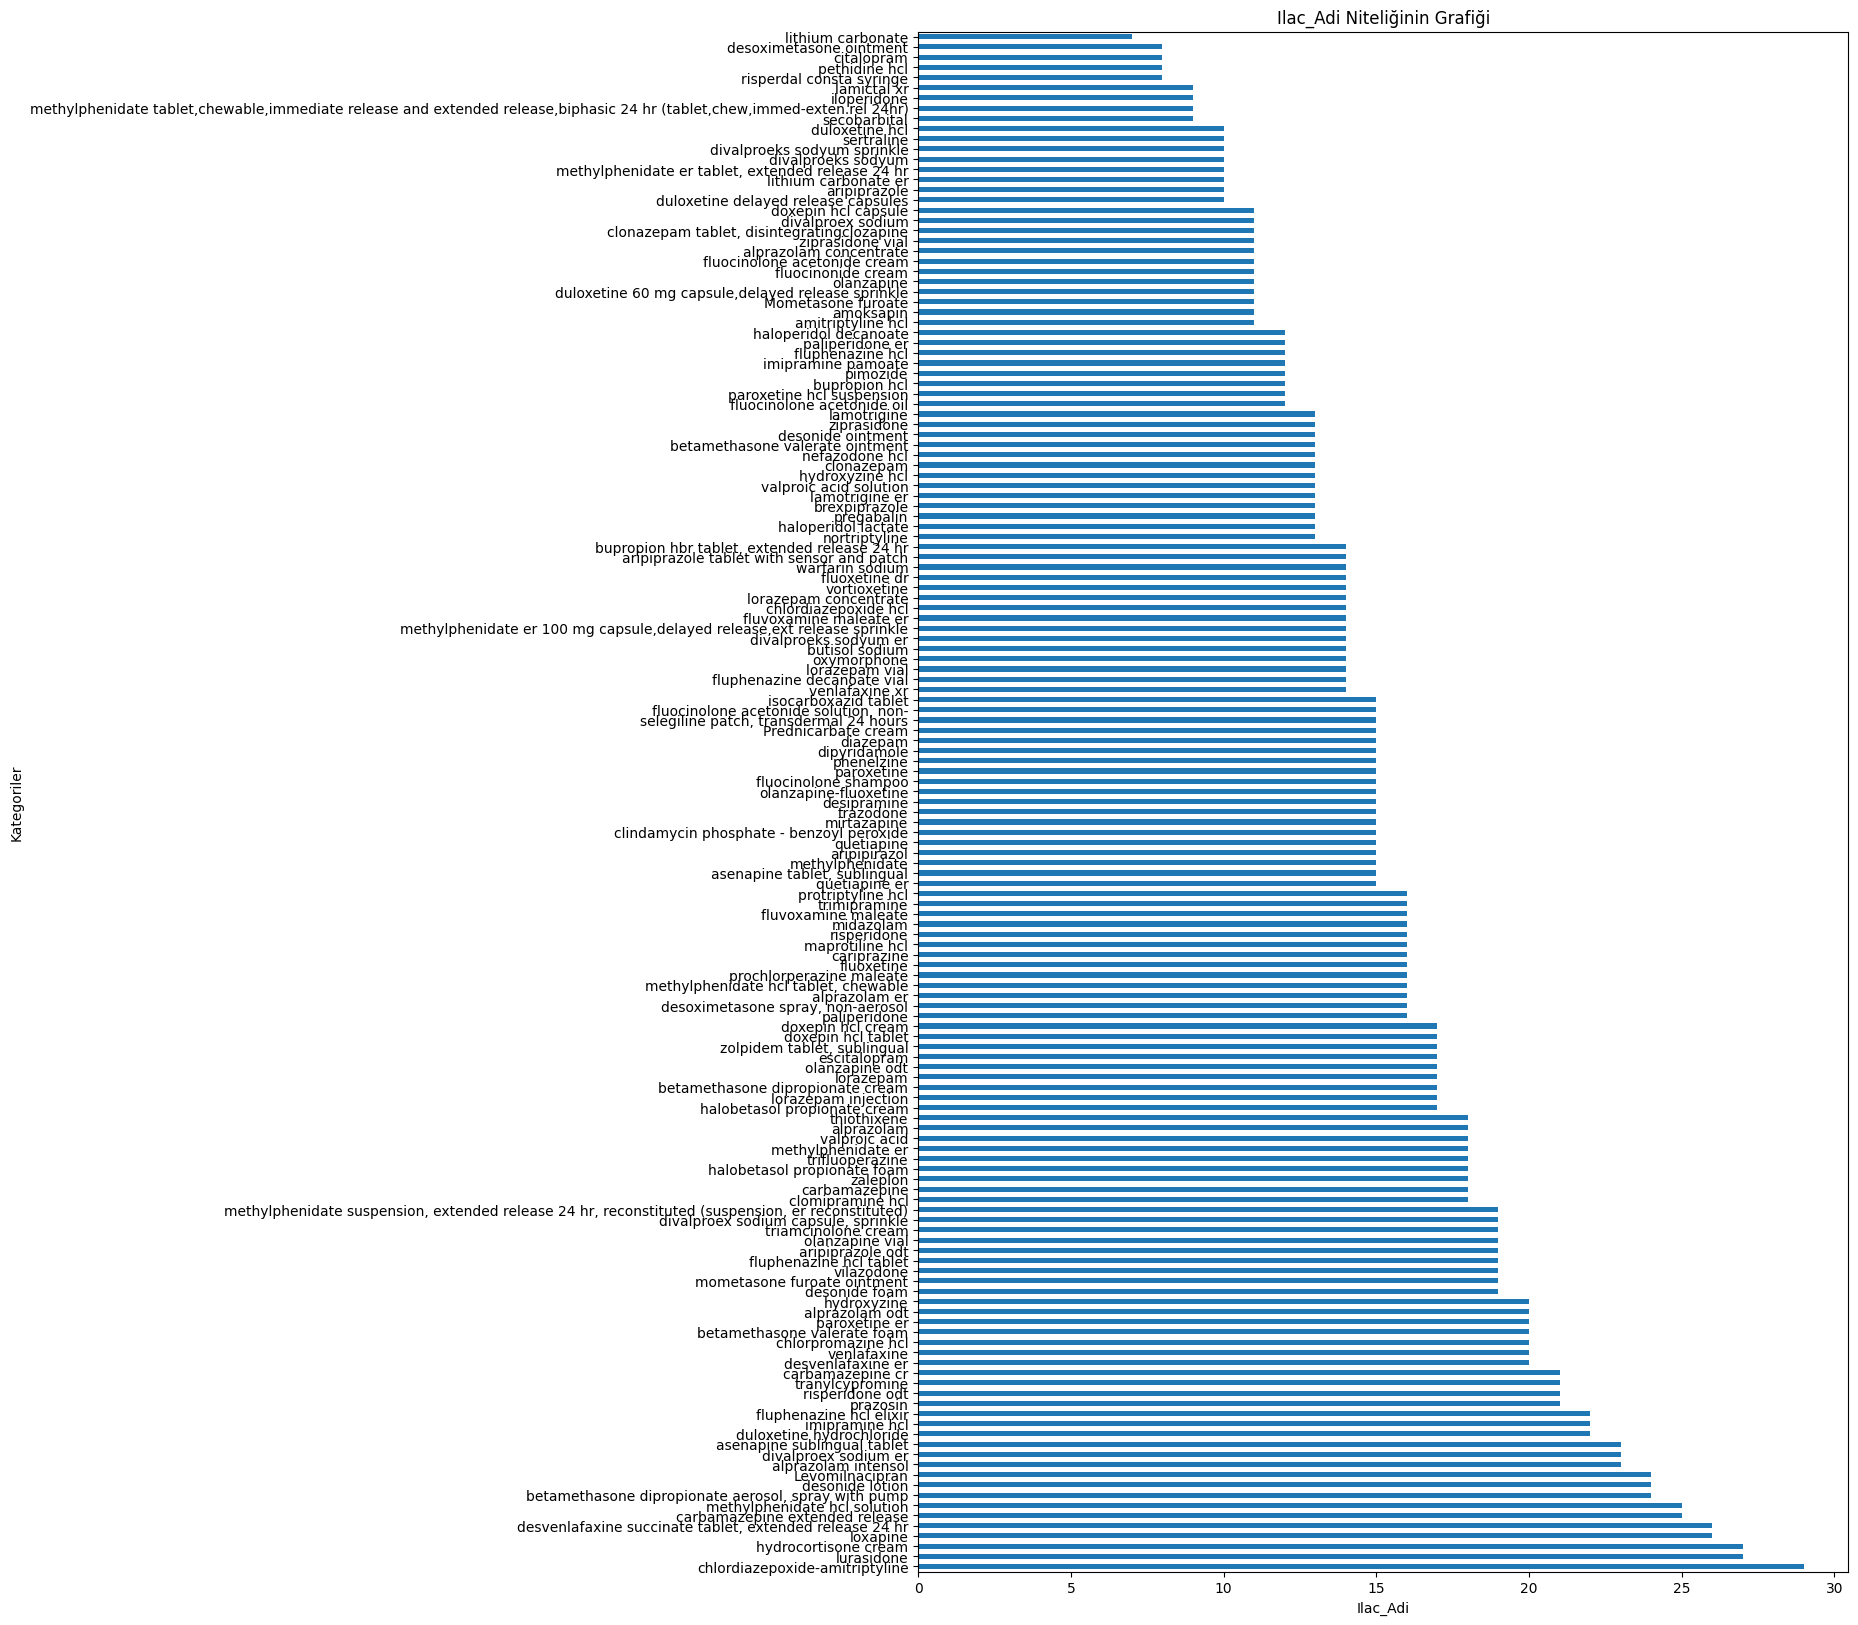

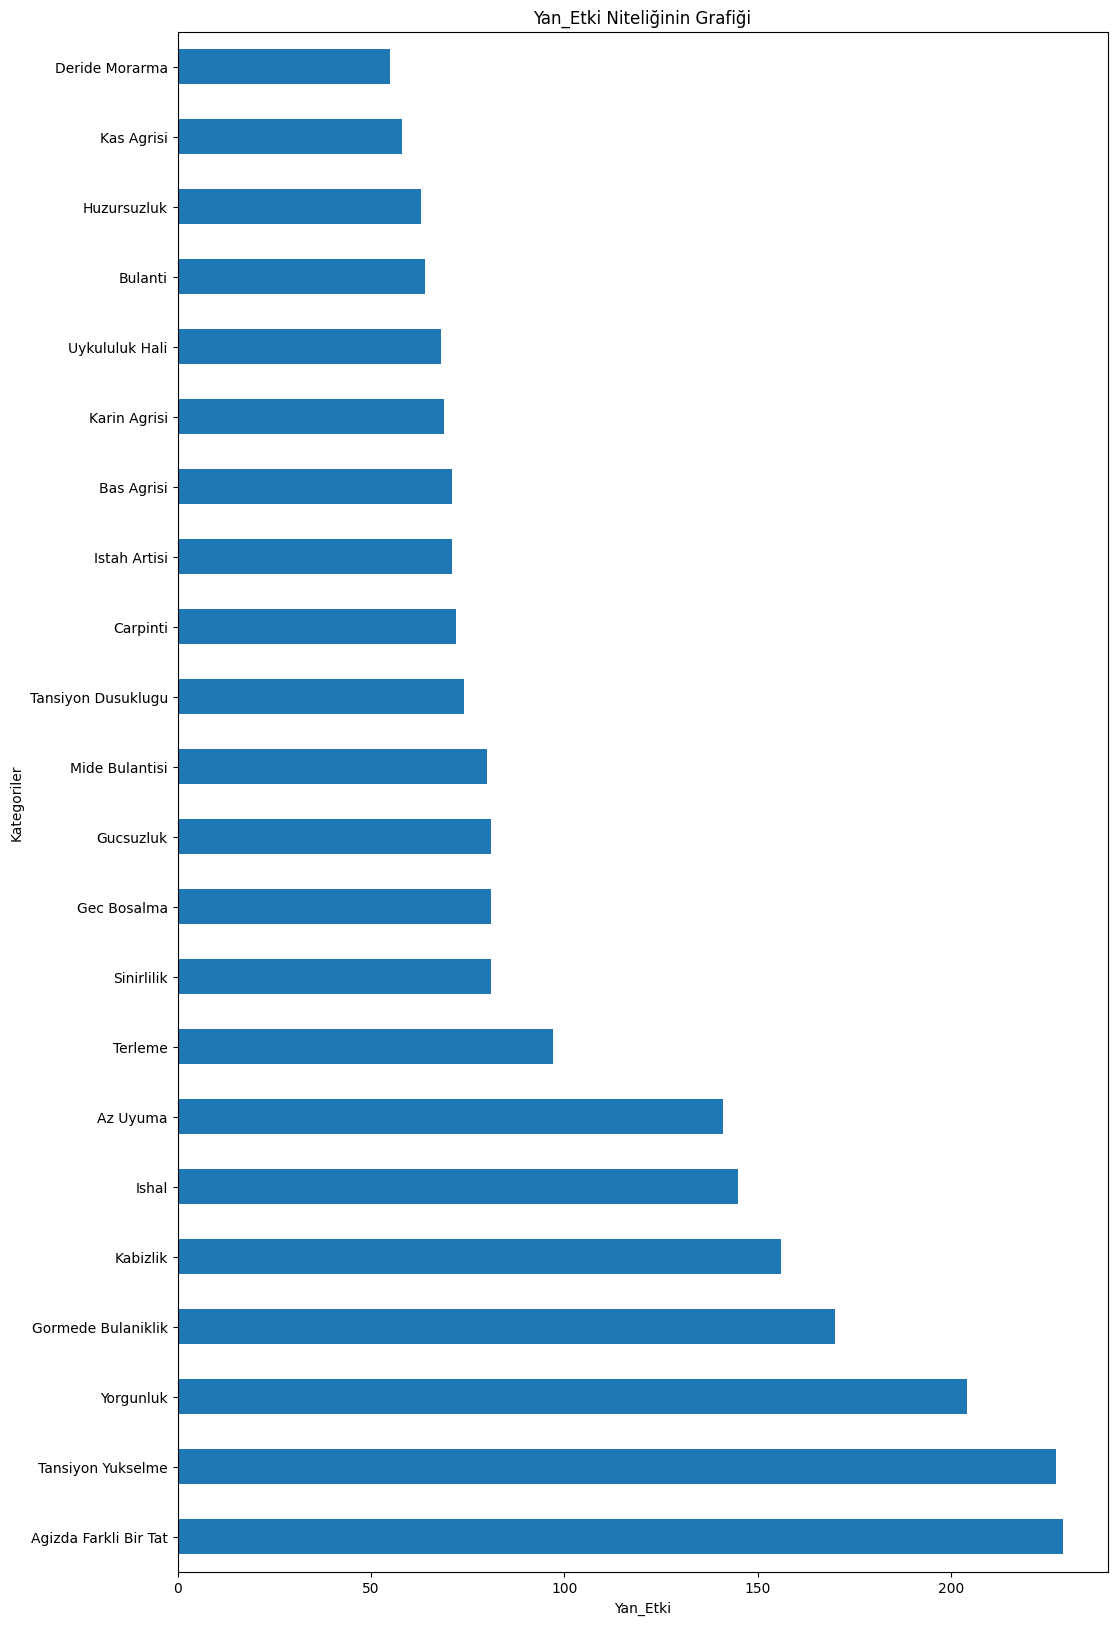

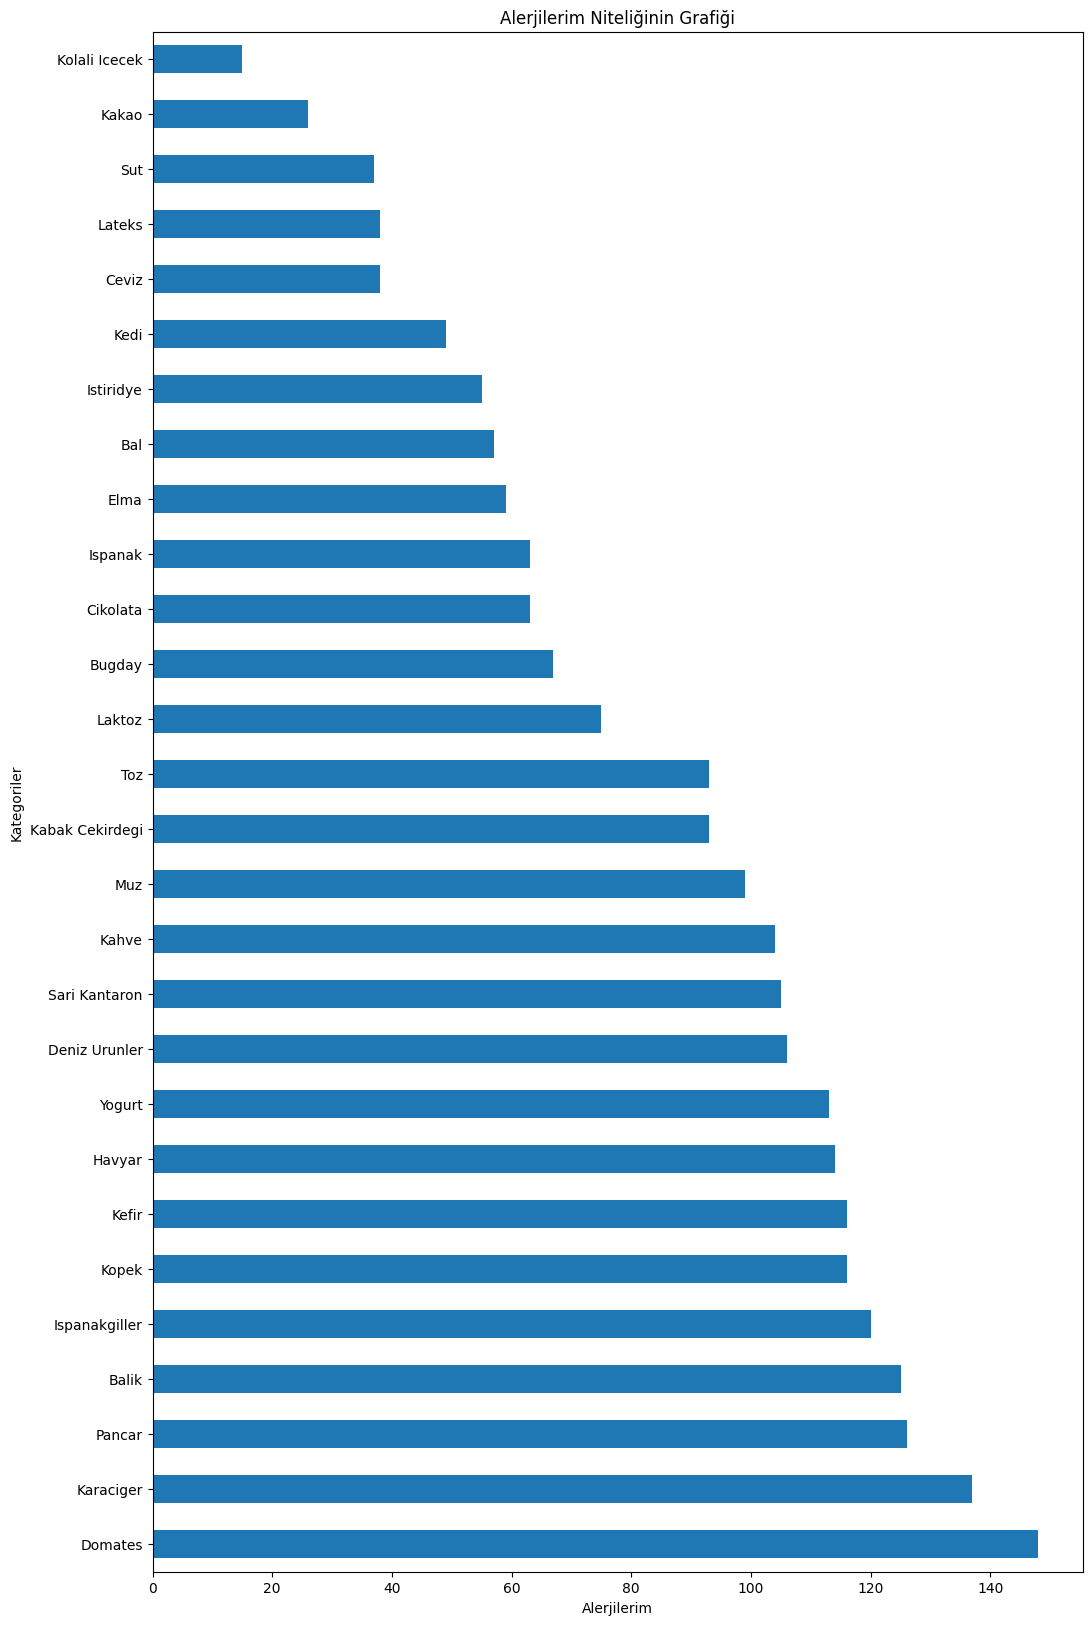

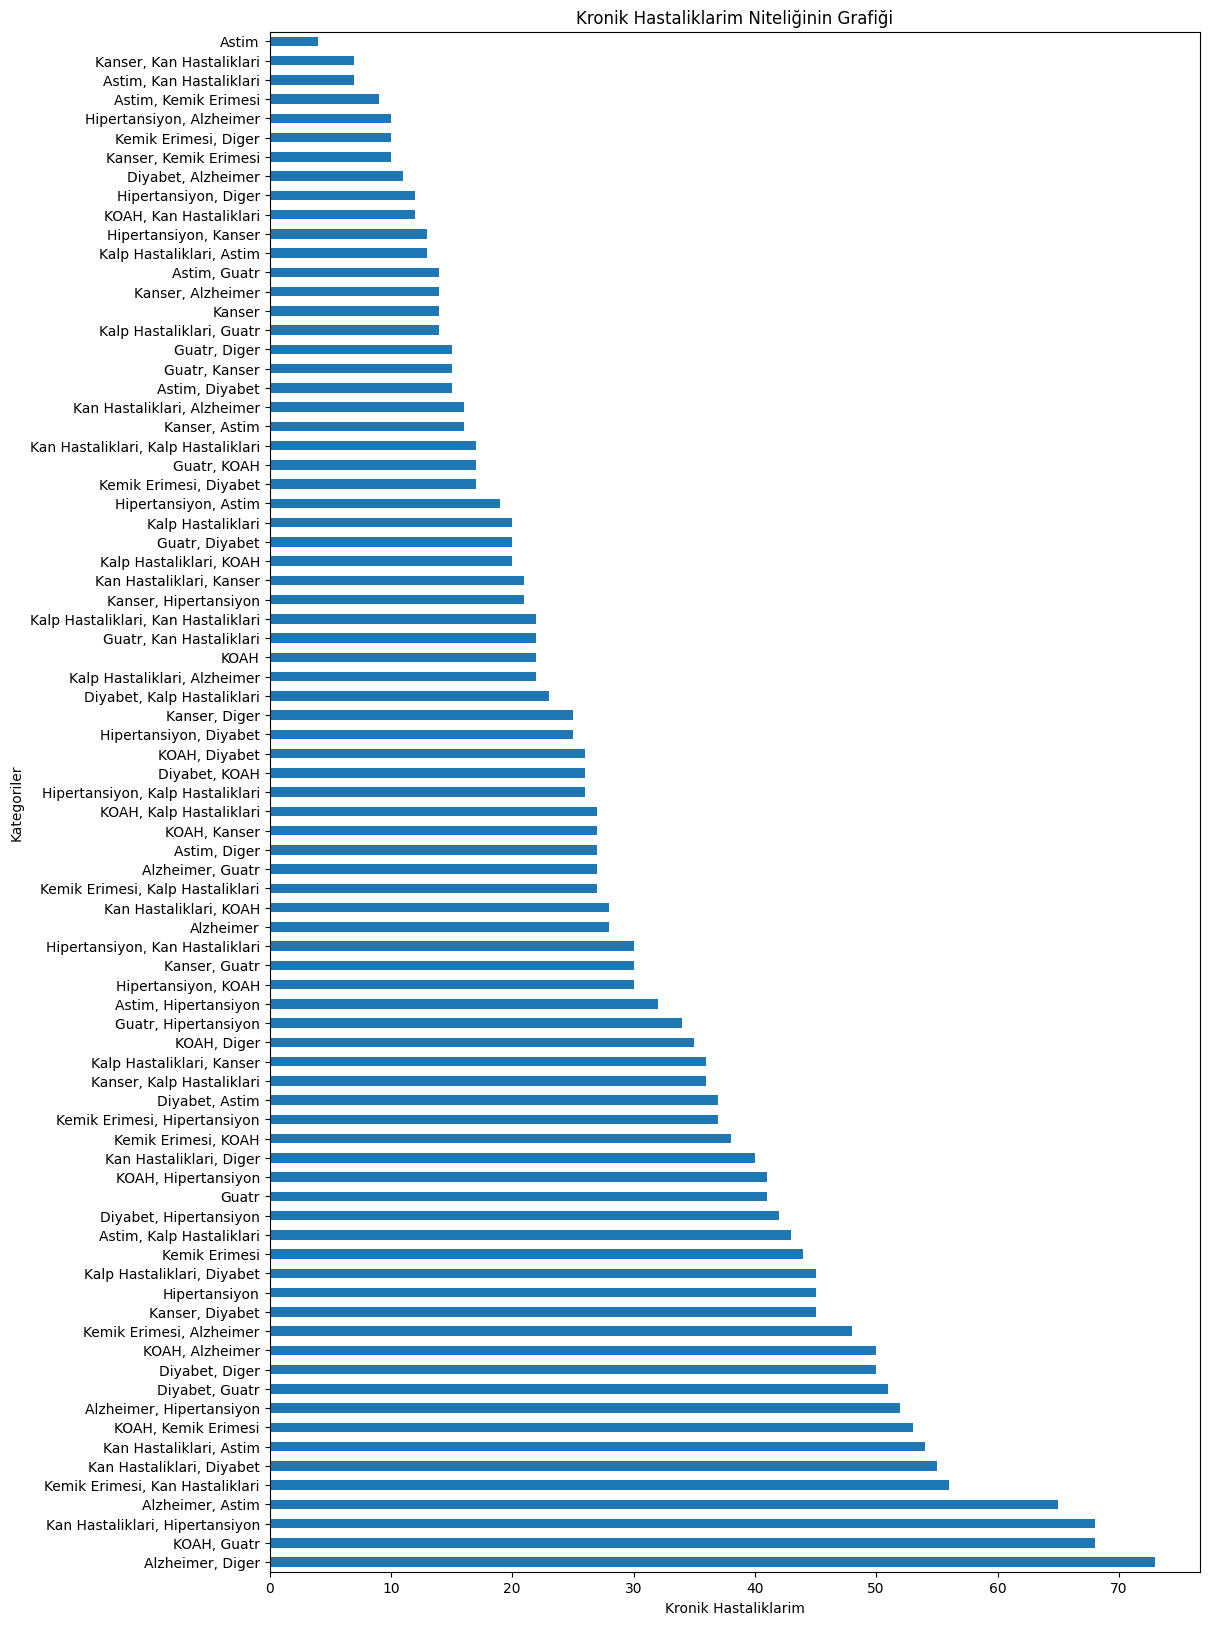

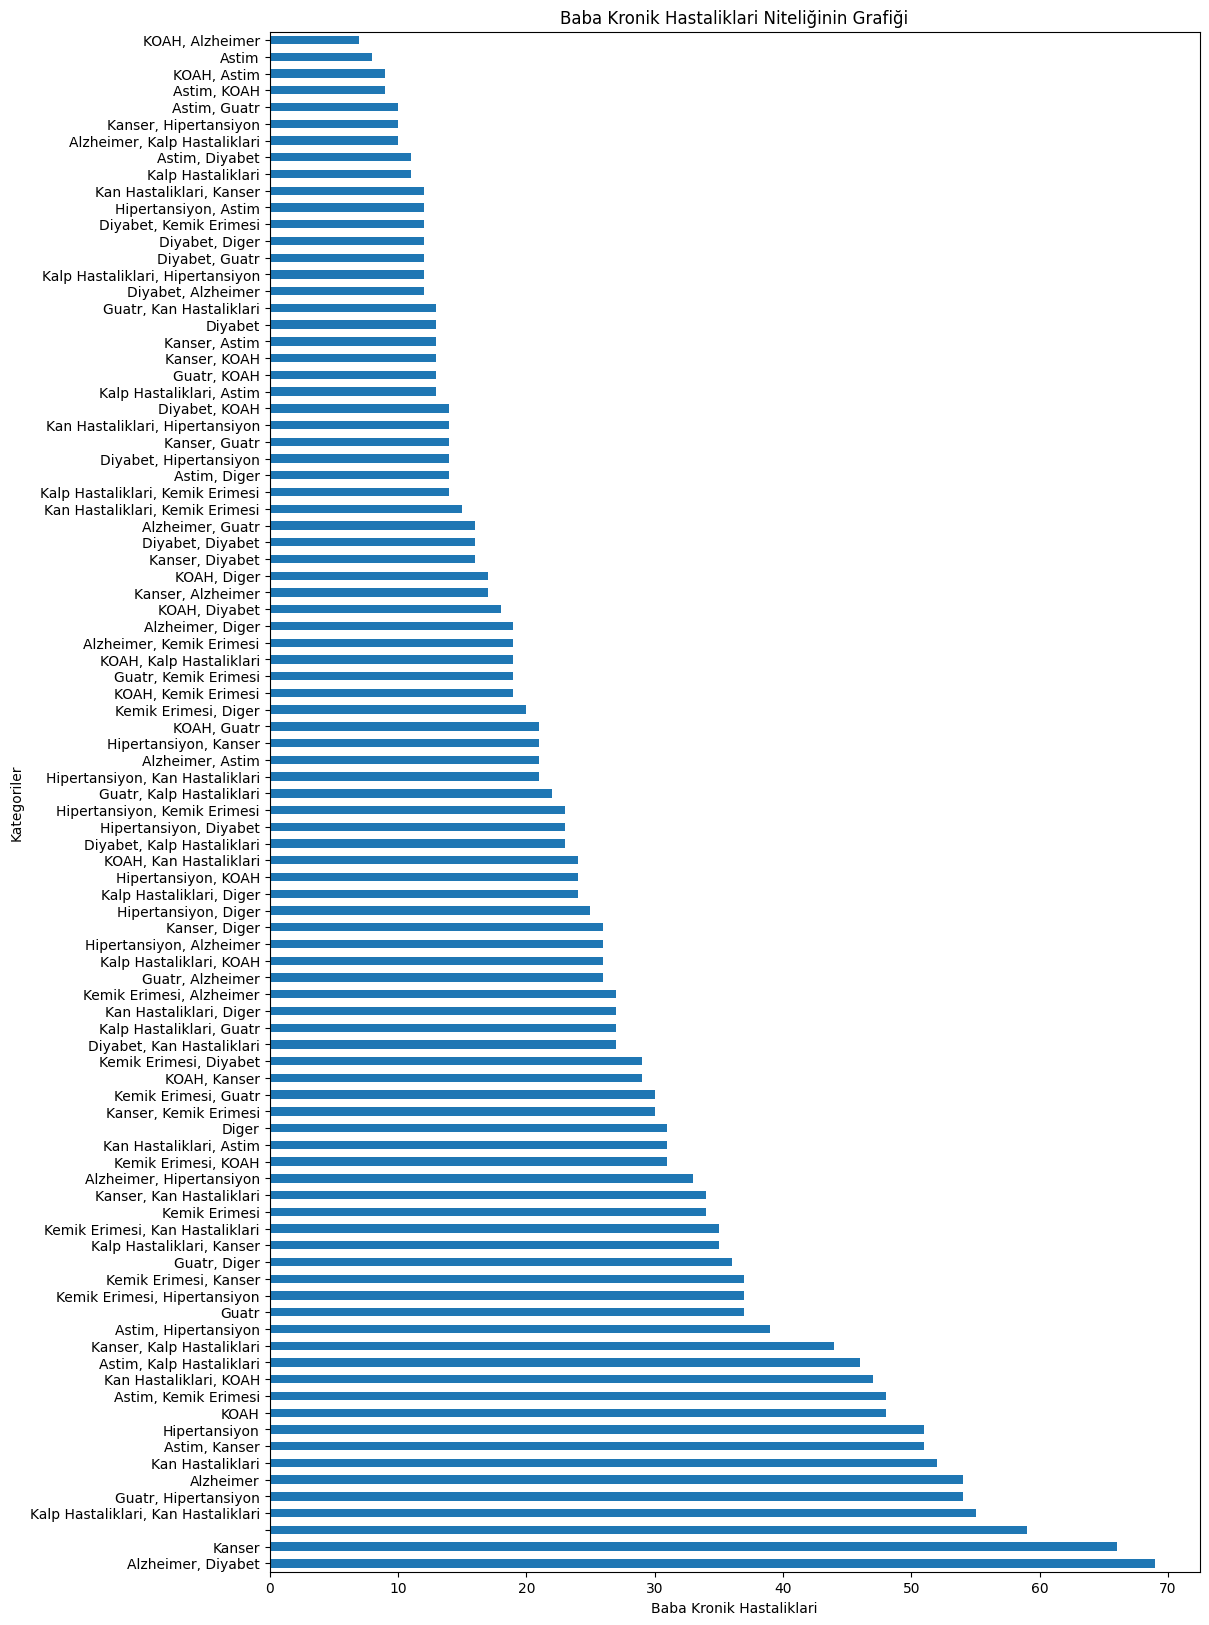

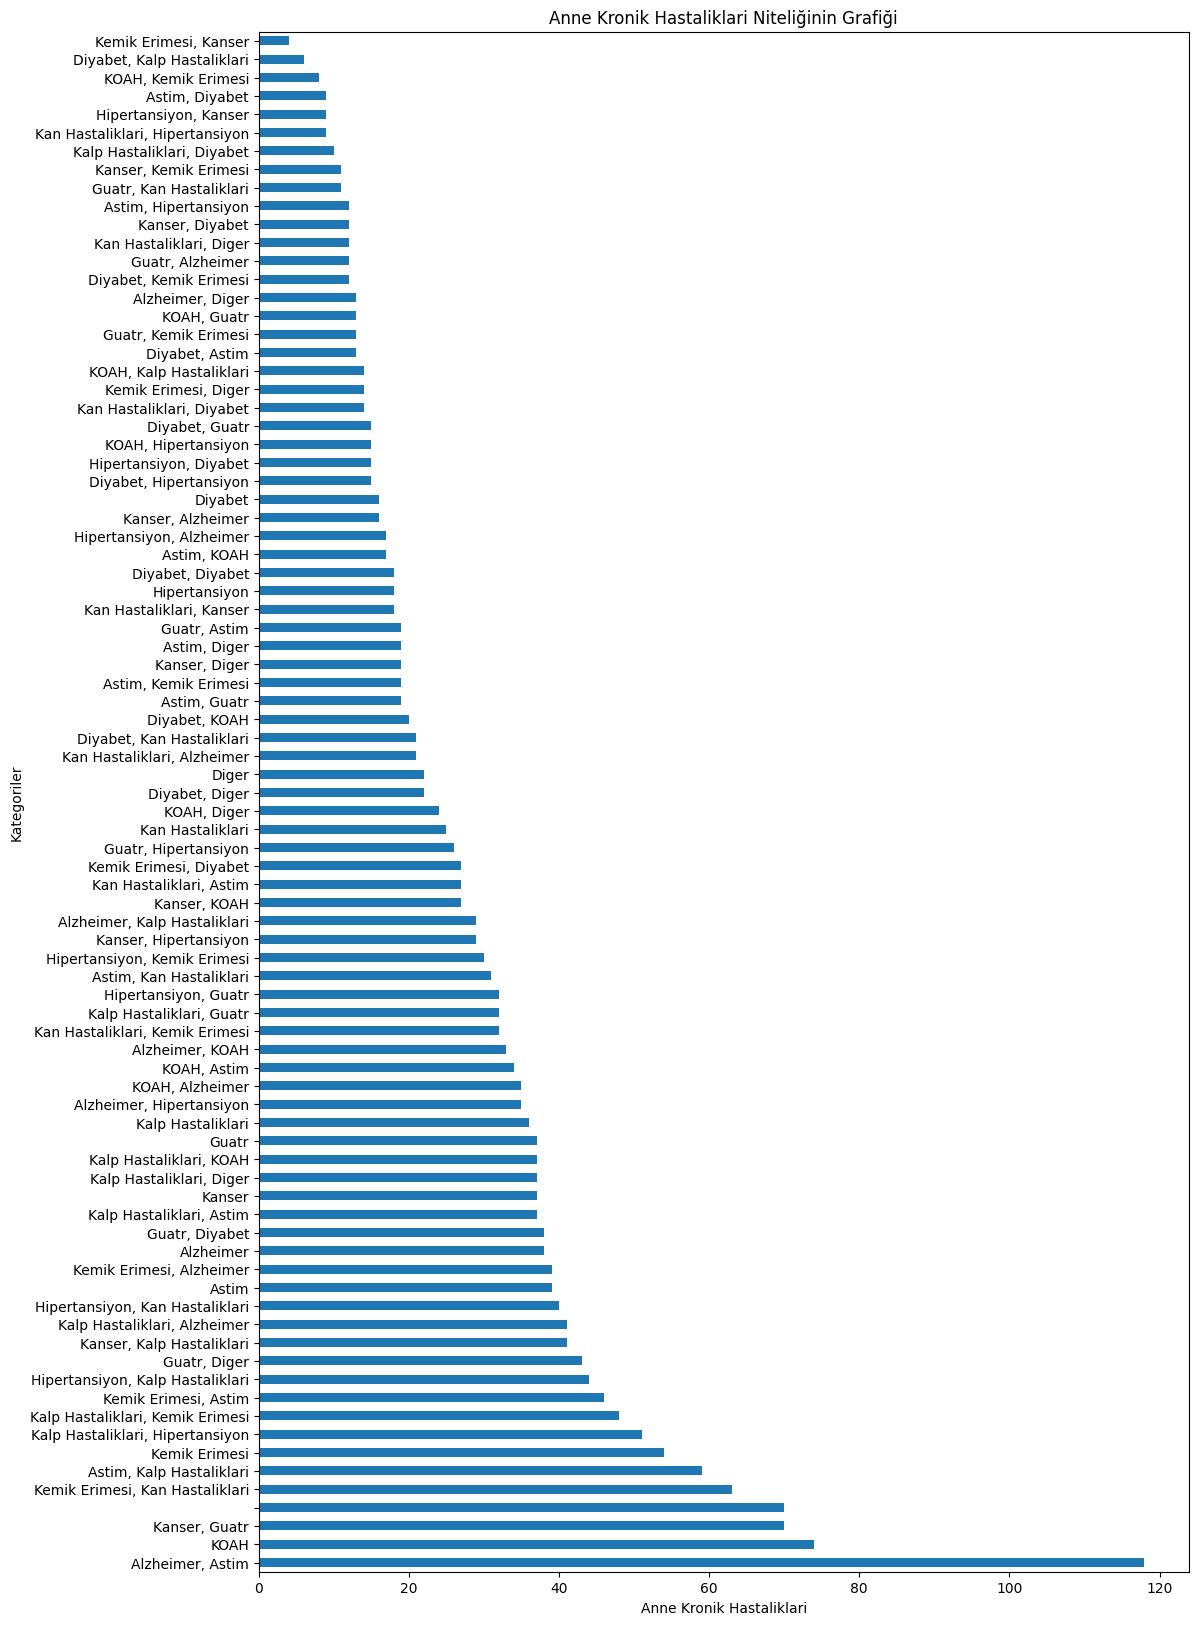

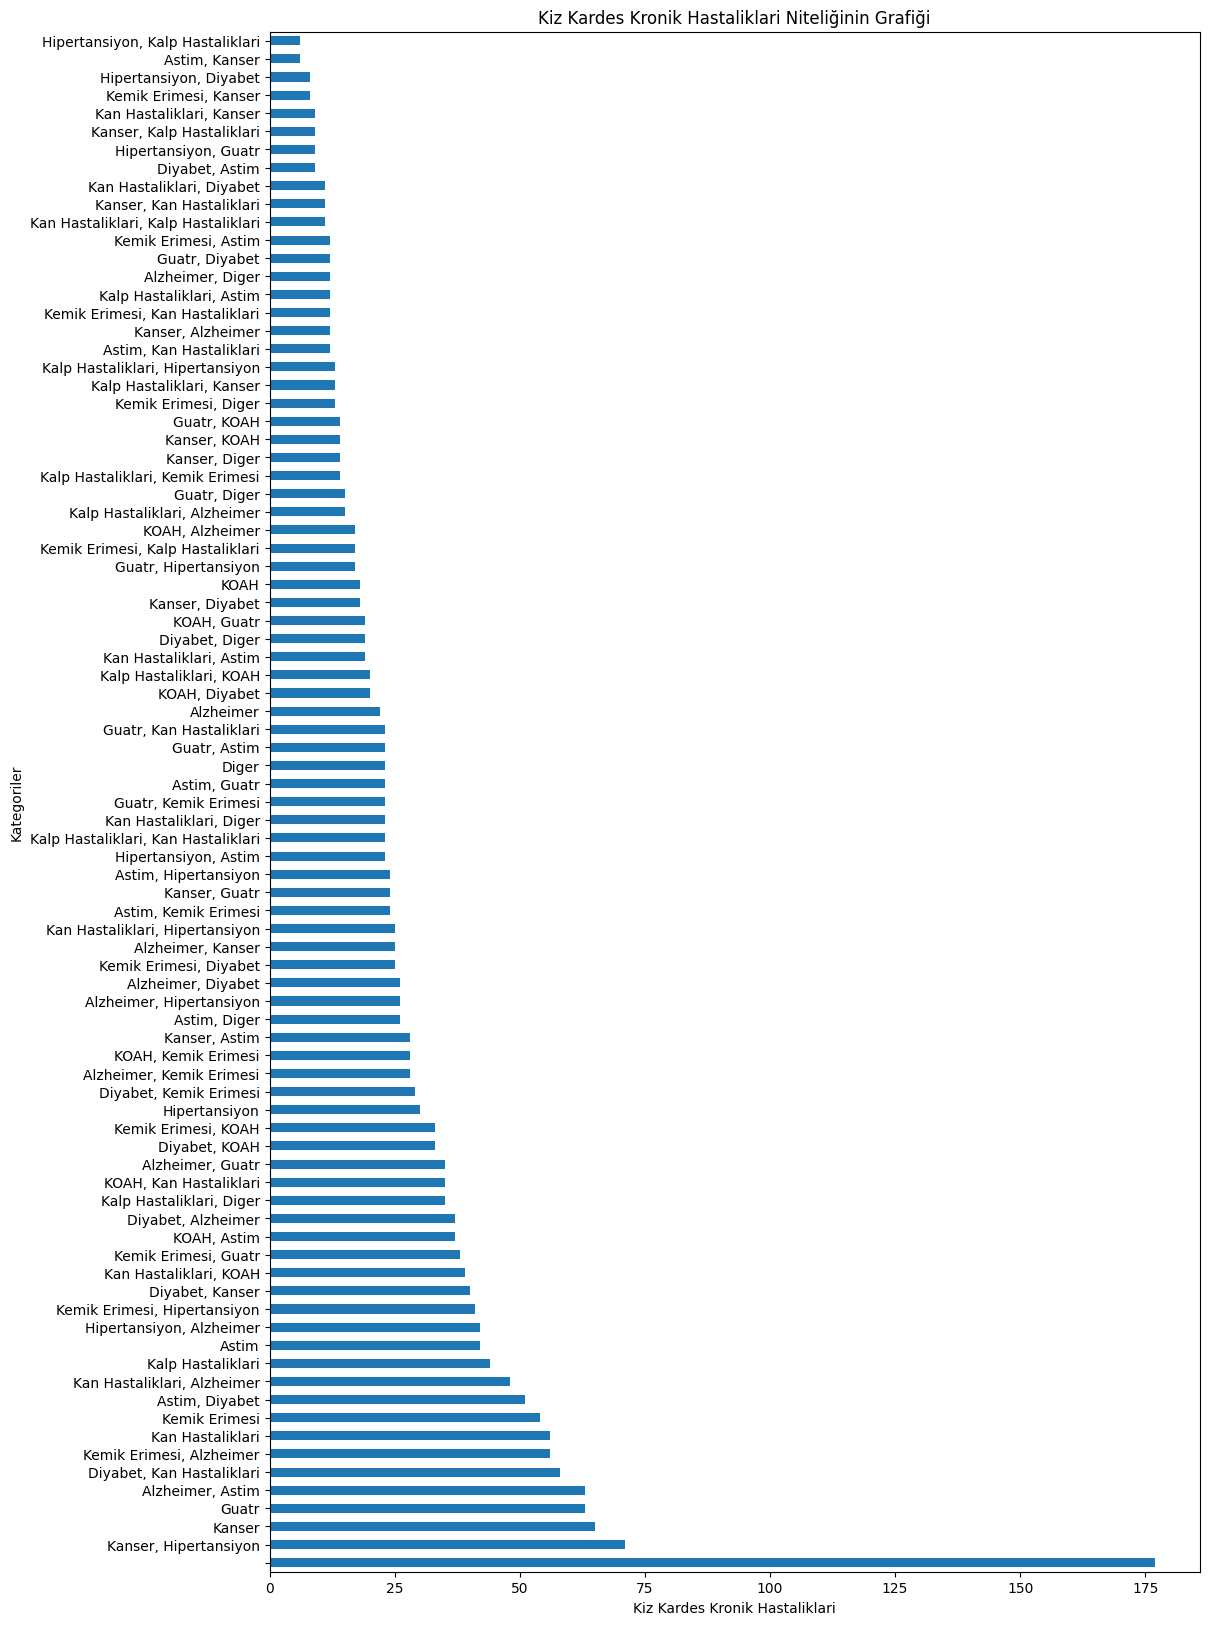

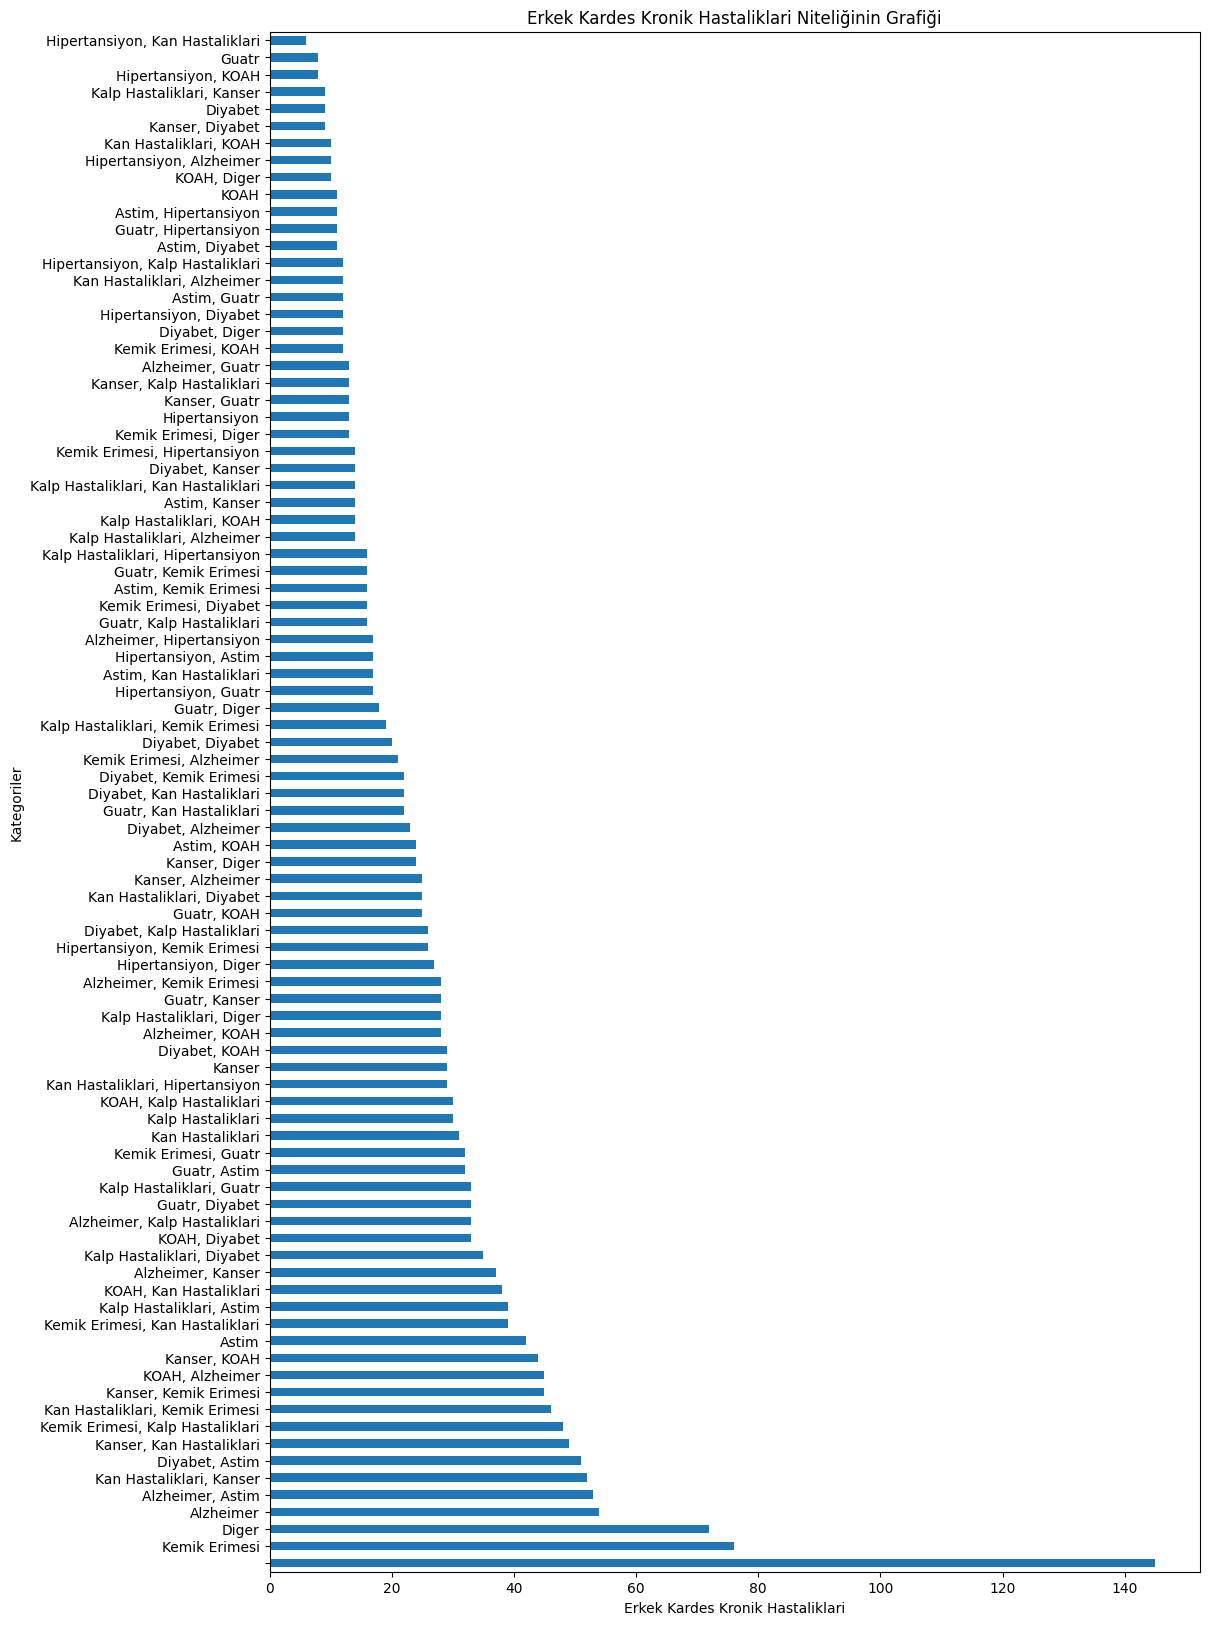

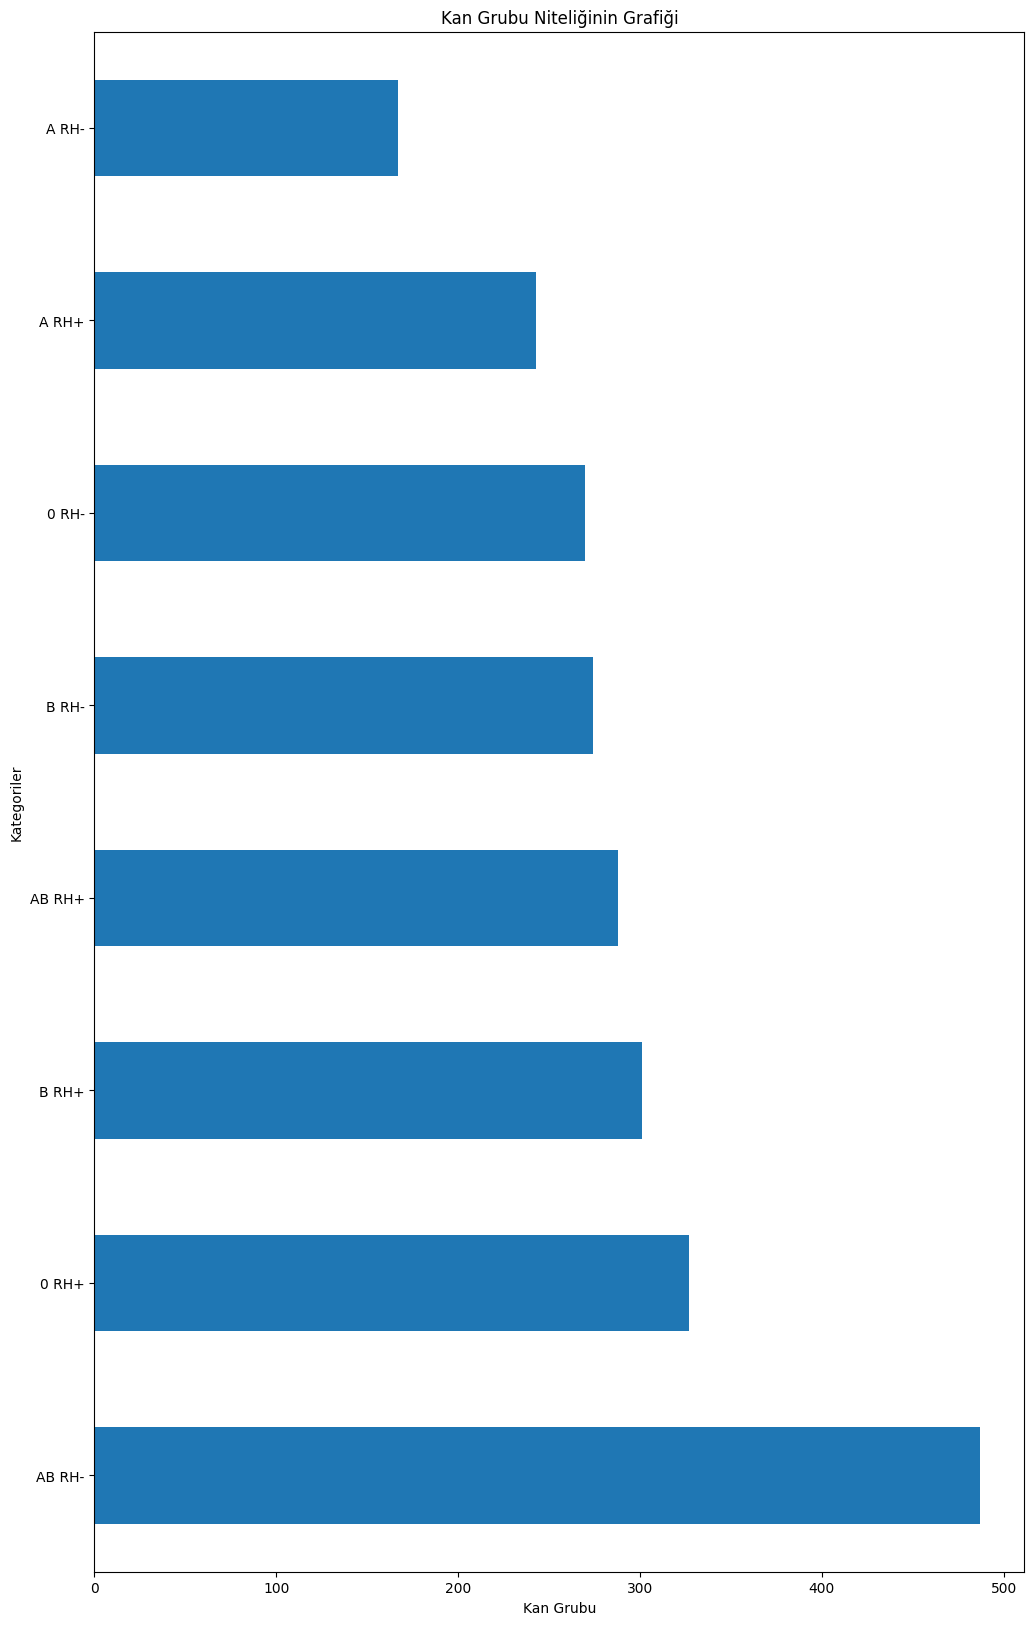

In [261]:
cat_col = cat_df.columns

for col in cat_col:
    plt.figure(figsize=(12, 20))
    df[col].value_counts().plot.barh()
    plt.title(f'{col} Niteliğinin Grafiği')
    plt.xlabel(col)
    plt.ylabel('Kategoriler')
    plt.show()

In [214]:
num_df = df.drop("Kullanici_id", axis = 1).select_dtypes(include = ["float64", "int64"])

In [215]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilo,2064.0,80.863857,18.635269,50.0,65.0,83.0,96.0,110.0
Boy,2243.0,174.638431,16.516552,145.0,160.0,176.0,187.0,203.0


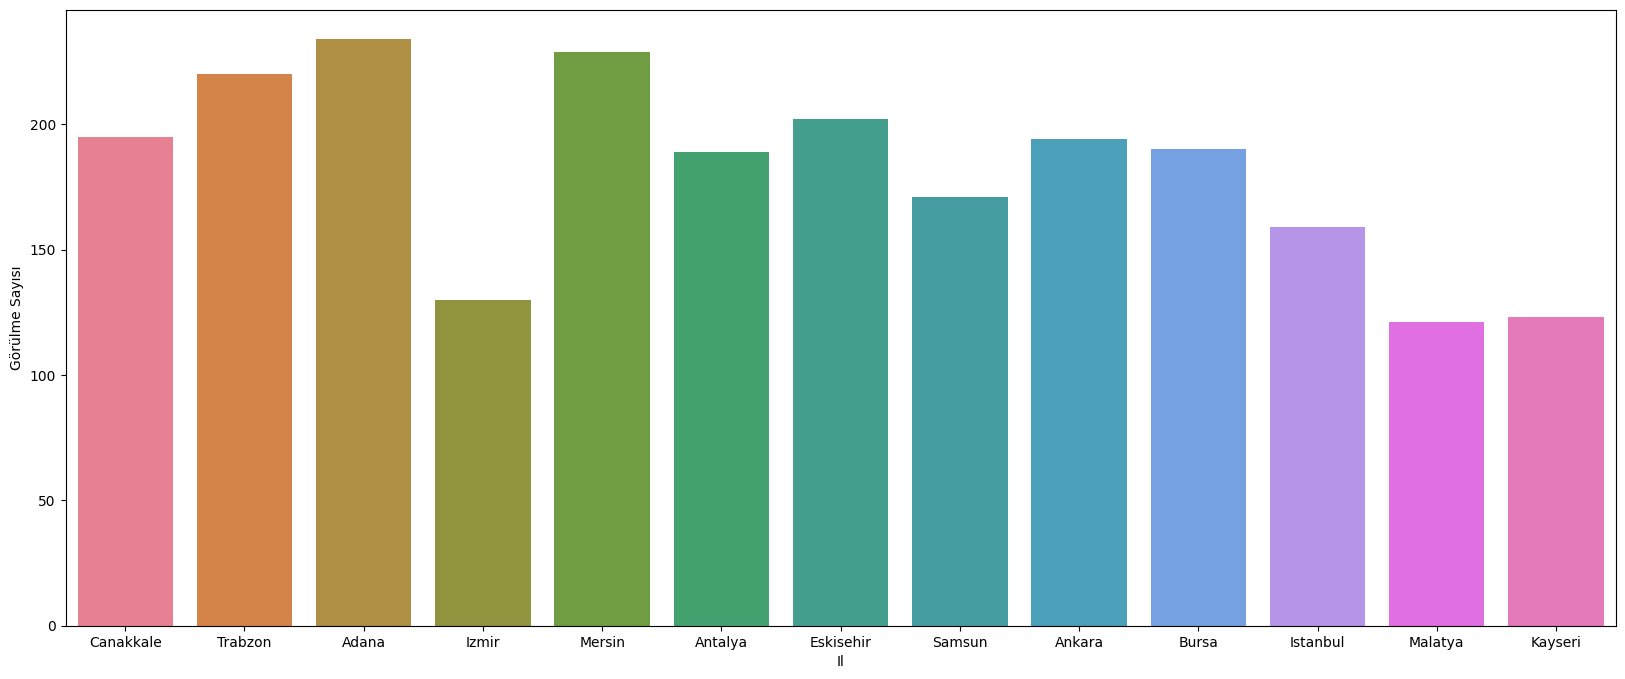

In [263]:
plt.figure(figsize=(20, 8))
sns.countplot(x = "Il", data= df, hue = "Il");
plt.ylabel("Kişi Sayısı")
plt.show()

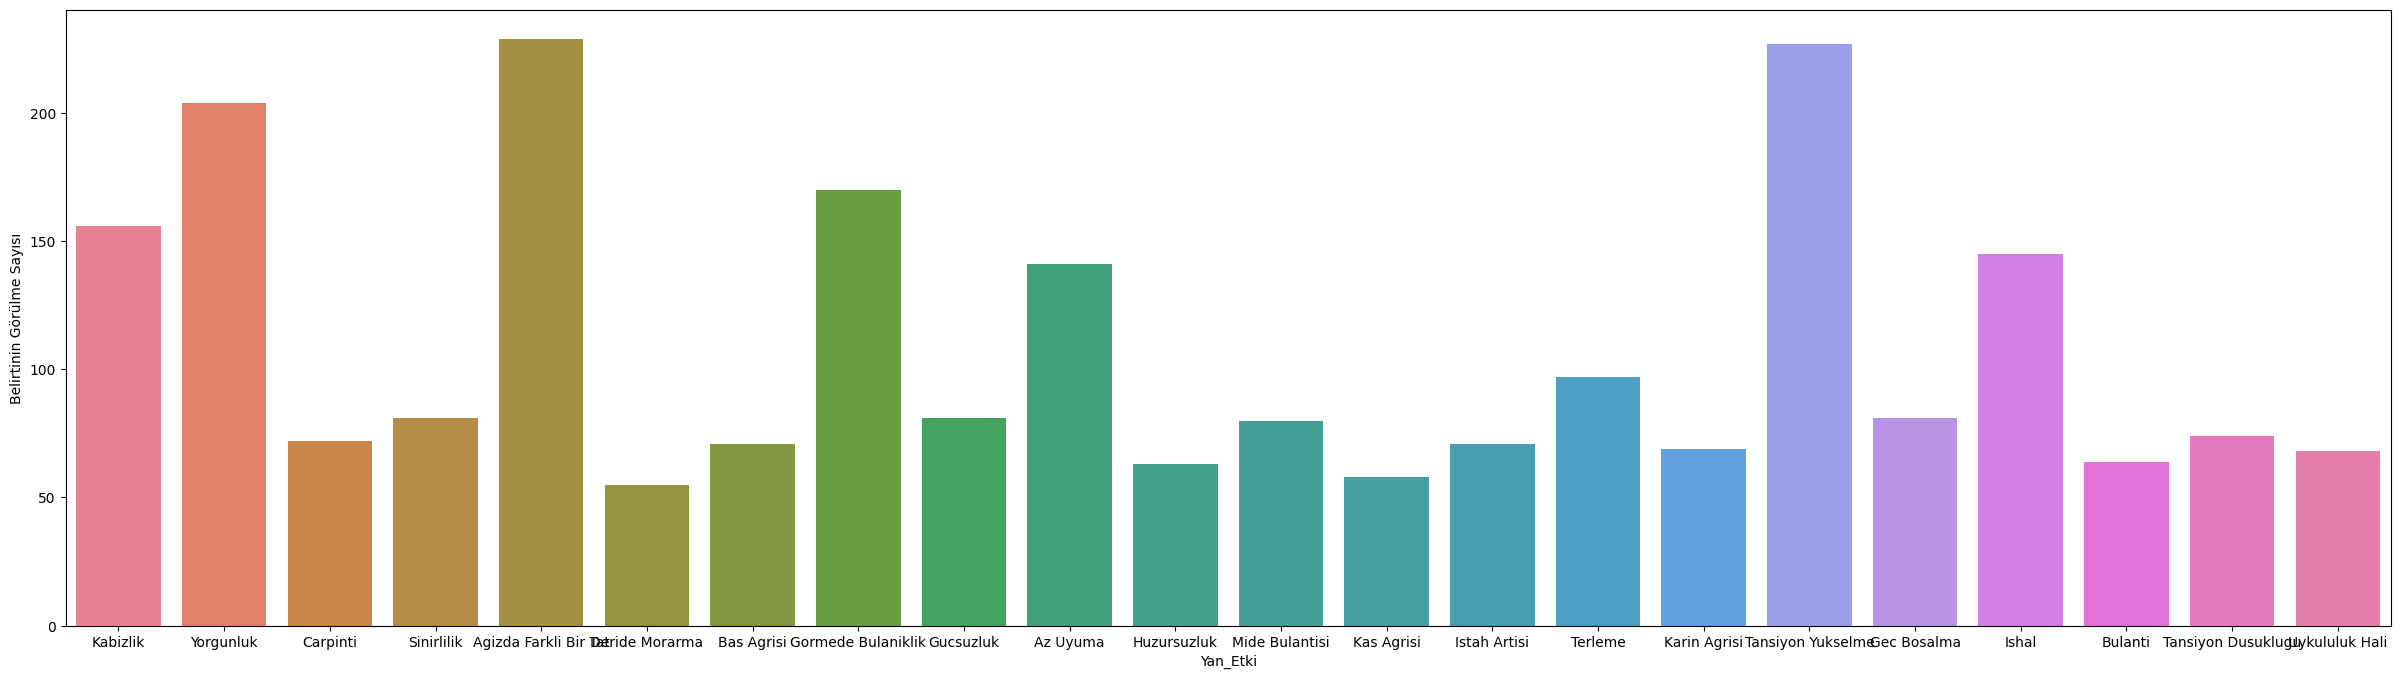

In [264]:
plt.figure(figsize=(30, 8))
sns.countplot(x = "Yan_Etki", data = df, hue = "Yan_Etki")
plt.ylabel("Belirtinin Görülme Sayısı")
plt.show()

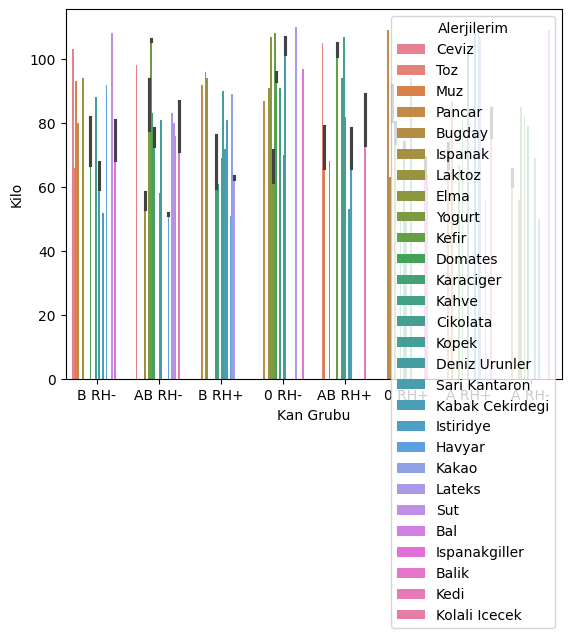

In [228]:
sns.barplot(x = "Kan Grubu", y = "Kilo", hue = "Alerjilerim", data = df);

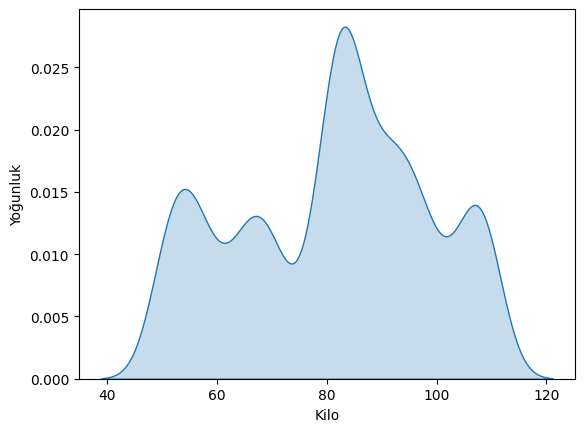

In [269]:
sns.kdeplot(df.Kilo, fill = True);
plt.ylabel("Yoğunluk")
plt.show()

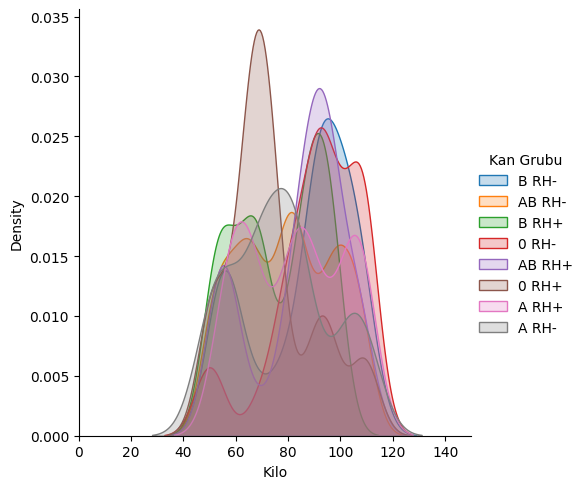

In [230]:
(sns
 .FacetGrid(df,
              hue = "Kan Grubu",
              height = 5,
              xlim = (0, 150))
 .map(sns.kdeplot, "Kilo", fill= True)
 .add_legend()
);

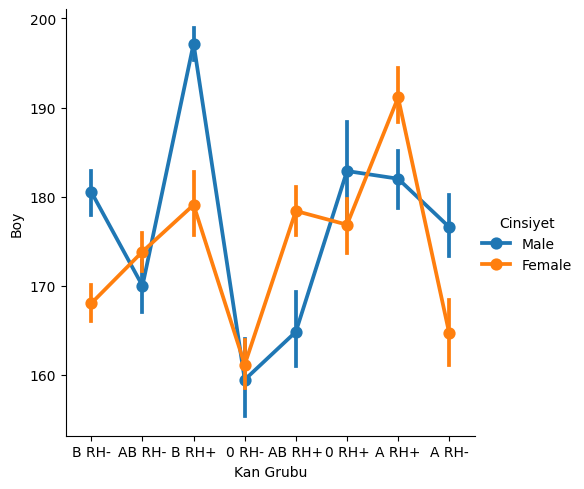

In [231]:
sns.catplot(x = "Kan Grubu", y = "Boy", hue = "Cinsiyet", kind = "point", data = df);

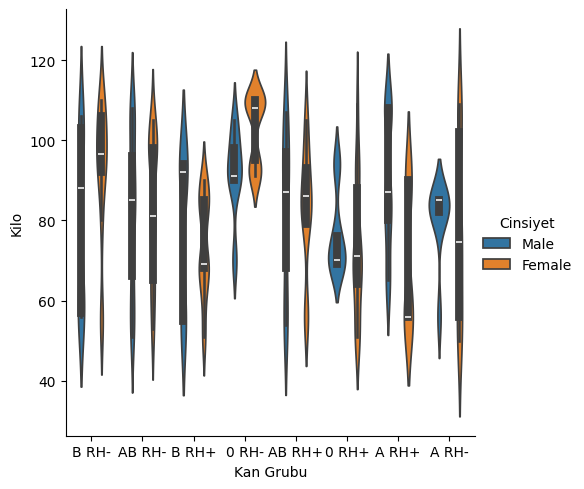

In [236]:
sns.catplot(x= "Kan Grubu", y = "Kilo", hue = "Cinsiyet",kind = "violin", data = df);

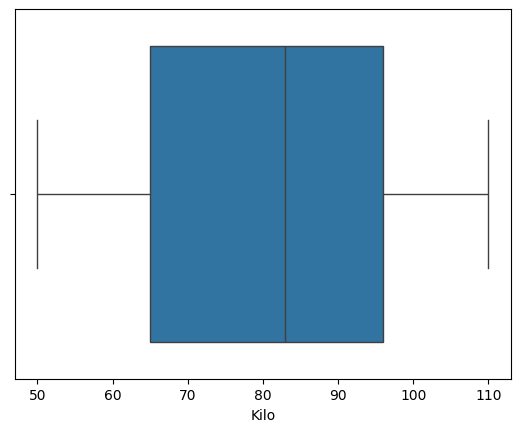

In [232]:
sns.boxplot(x = df["Kilo"]);

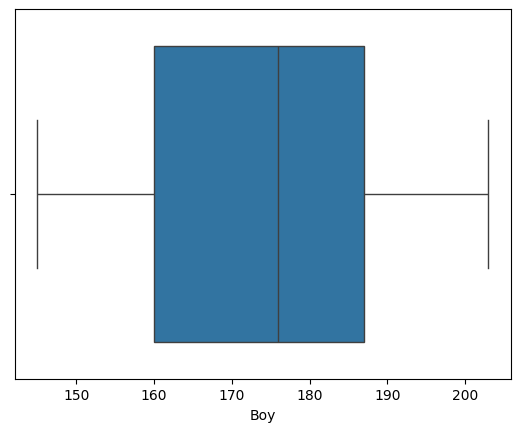

In [233]:
sns.boxplot(x = df["Boy"]);

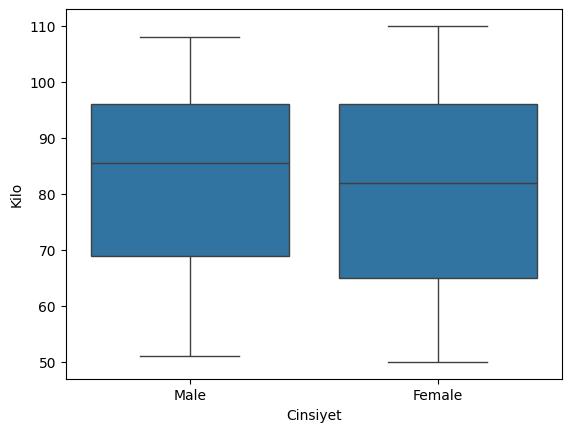

In [234]:
sns.boxplot(x = "Cinsiyet", y = "Kilo", data = df);

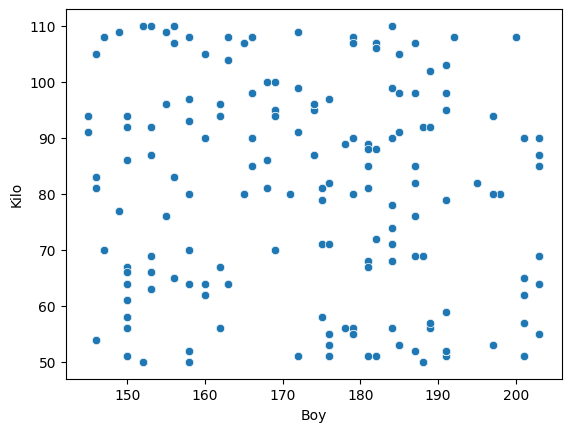

In [237]:
sns.scatterplot(x = "Boy", y = "Kilo", data = df);

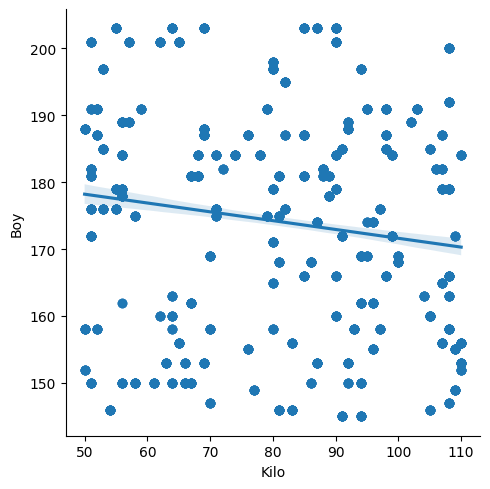

In [238]:
sns.lmplot(x = "Kilo", y = "Boy", data = df);

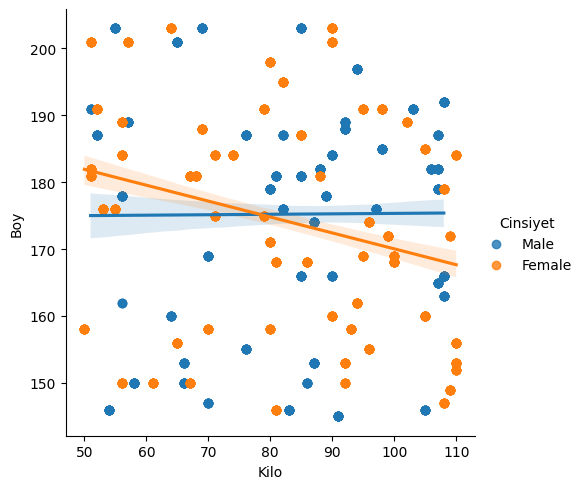

In [240]:
sns.lmplot(x = "Kilo", y = "Boy", hue = "Cinsiyet", data = df);

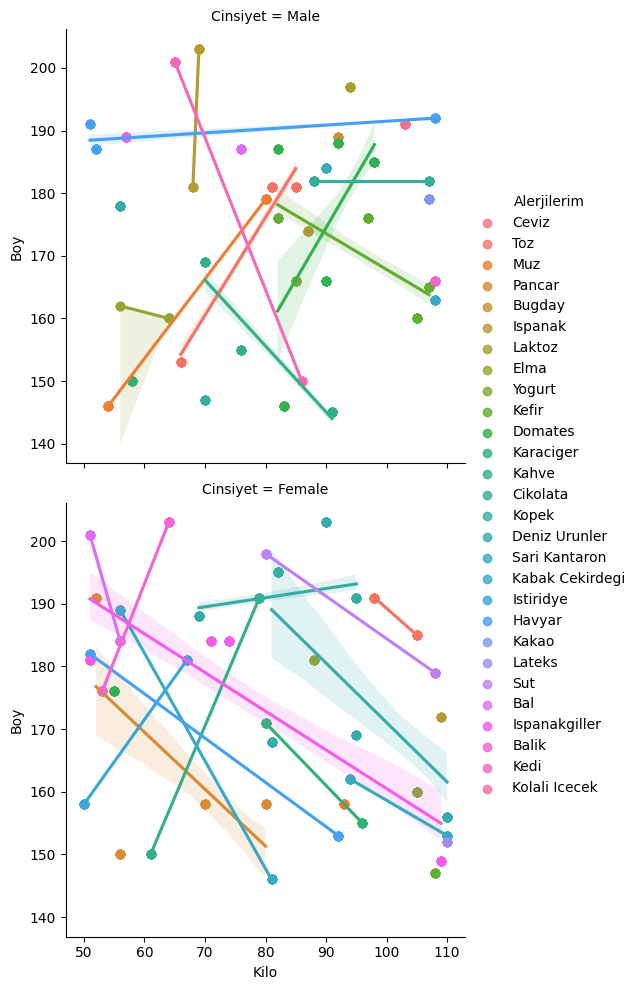

In [242]:
sns.lmplot(x = "Kilo", y = "Boy", hue = "Alerjilerim", row = "Cinsiyet", data = df);

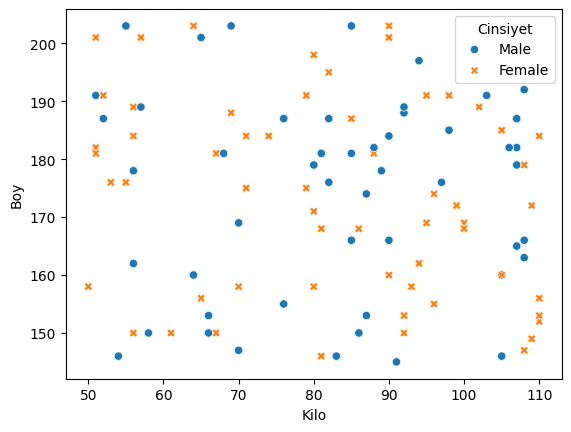

In [241]:
sns.scatterplot(x = "Kilo", y = "Boy", hue = "Cinsiyet", style = "Cinsiyet", data = df);

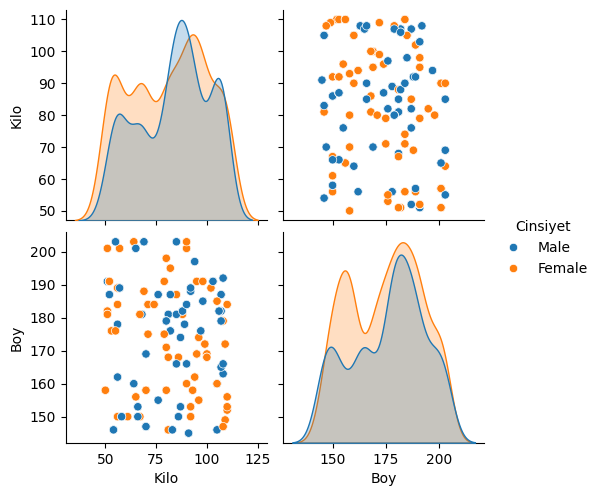

In [244]:
sns.pairplot(df.drop("Kullanici_id", axis = 1), hue = "Cinsiyet");

ÖN İŞLEME AŞAMALARI

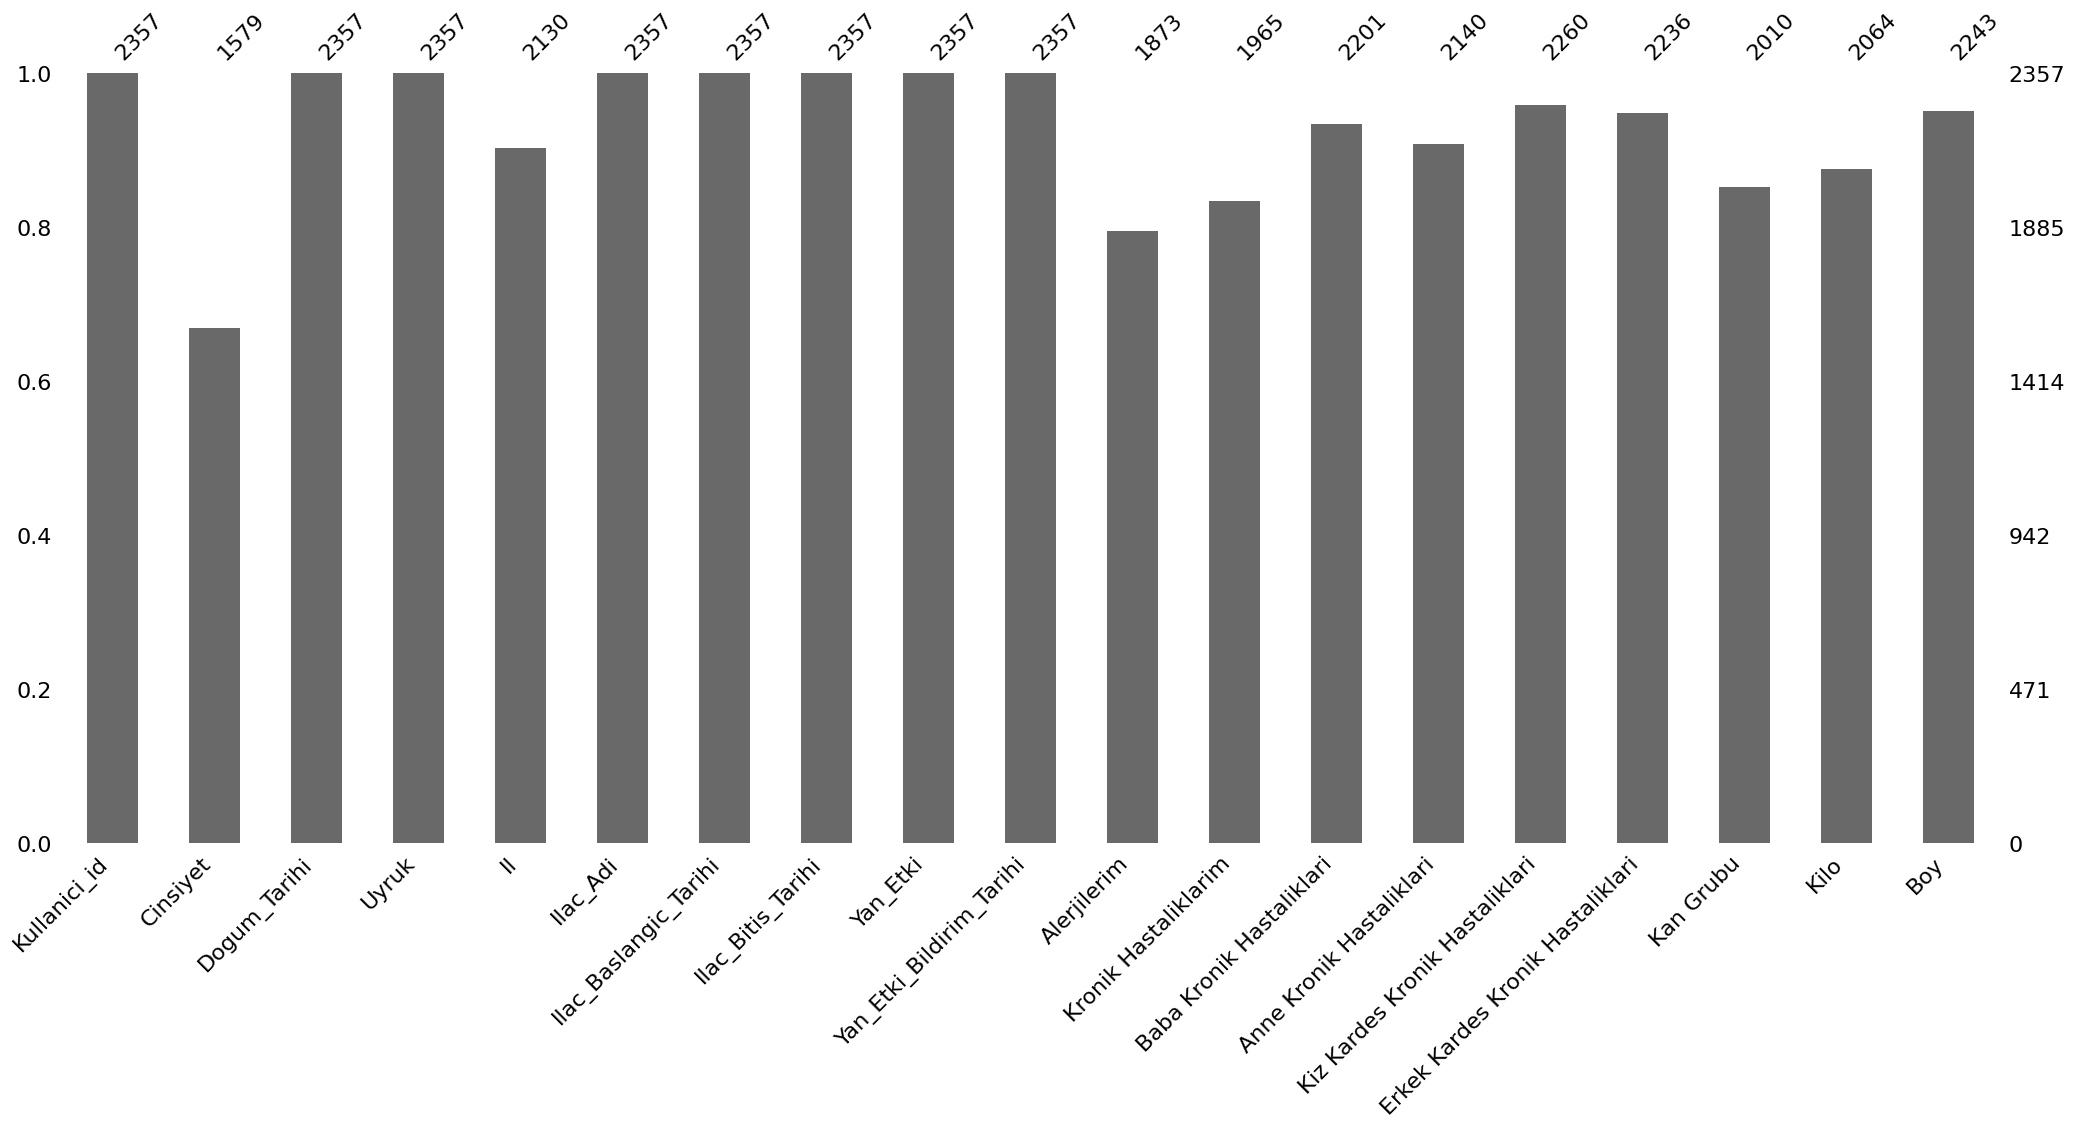

In [248]:
msno.bar(df);

In [101]:
# df = pd.read_excel("side_effect_data 1.xlsx")

In [246]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [247]:
df.isnull().sum()

,0
Kullanici_id,0
Cinsiyet,778
Dogum_Tarihi,0
Uyruk,0
Il,227
Ilac_Adi,0
Ilac_Baslangic_Tarihi,0
Ilac_Bitis_Tarihi,0
Yan_Etki,0
Yan_Etki_Bildirim_Tarihi,0


In [249]:
df["Kilo"].fillna(df["Kilo"].median(), inplace = True)
df["Boy"].fillna(df["Boy"].median(), inplace = True)

In [250]:
cat_df = df.select_dtypes(include = ["object"])
df[cat_df.columns] = cat_df.apply(lambda x: x.fillna(method = "ffill"))

<ipython-input-250-196304738414>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cat_df.columns] = cat_df.apply(lambda x: x.fillna(method = "ffill"))


In [253]:
num_df = df.drop(["Kullanici_id"], axis = 1).select_dtypes(include=['float64', 'int64'])
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(num_df)
scores = clf.negative_outlier_factor_
limit = np.sort(scores)[13]
yeni_df  = df[scores > limit]

In [254]:
yeni_df.isnull().sum()

,0
Kullanici_id,0
Cinsiyet,0
Dogum_Tarihi,0
Uyruk,0
Il,0
Ilac_Adi,0
Ilac_Baslangic_Tarihi,0
Ilac_Bitis_Tarihi,0
Yan_Etki,0
Yan_Etki_Bildirim_Tarihi,0


In [255]:
yeni_df.reset_index(inplace = True, drop = True)

In [256]:
yeni_df

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,"Hipertansiyon, Kan Hastaliklari","Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",B RH-,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger","Kemik Erimesi, Diyabet",Astim,"Kalp Hastaliklari, Kanser",AB RH-,83.0,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,Pancar,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,9,Female,1957-01-04,Turkiye,Istanbul,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,Ispanakgiller,"KOAH, Hipertansiyon",,"Astim, Guatr",,"KOAH, Kan Hastaliklari",A RH-,50.0,152.0
2332,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Istiridye,"KOAH, Hipertansiyon","Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,83.0,178.0
2333,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger","Astim, Kemik Erimesi","Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.0,203.0
2334,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,Sari Kantaron,"Alzheimer, Diger","Alzheimer, Diger","Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",B RH+,90.0,184.0


In [257]:
num_df = yeni_df.drop(["Kullanici_id"], axis = 1).select_dtypes(include=['float64', 'int64'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(num_df)
scaled_df = scaler.transform(num_df)

scaled_df = pd.DataFrame(scaled_df, columns=num_df.columns)

In [258]:
scaled_df = pd.concat([yeni_df.drop(["Kilo", "Boy"], axis = 1), scaled_df], axis = 1)

In [259]:
data = pd.get_dummies(scaled_df, columns = cat_df.columns)

In [260]:
data

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy,Cinsiyet_Female,Cinsiyet_Male,Uyruk_Turkiye,...,"Erkek Kardes Kronik Hastaliklari_Kemik Erimesi, Kalp Hastaliklari","Erkek Kardes Kronik Hastaliklari_Kemik Erimesi, Kan Hastaliklari",Kan Grubu_0 RH+,Kan Grubu_0 RH-,Kan Grubu_A RH+,Kan Grubu_A RH-,Kan Grubu_AB RH+,Kan Grubu_AB RH-,Kan Grubu_B RH+,Kan Grubu_B RH-
0,107,1960-03-01,2022-01-09,2022-03-04,2022-02-19 18:28:43,0.883333,0.793103,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,140,1939-10-12,2022-01-09,2022-03-08,2022-02-03 20:48:17,0.516667,0.620690,False,True,True,...,False,False,False,False,False,False,False,False,False,True
2,2,1976-12-17,2022-01-11,2022-03-12,2022-02-04 05:29:20,0.716667,0.224138,True,False,True,...,False,False,False,False,False,False,False,False,False,True
3,83,1977-06-17,2022-01-04,2022-03-12,2022-02-08 01:01:21,0.550000,0.344828,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,7,1976-09-03,2022-01-13,2022-03-06,2022-02-12 05:33:06,0.816667,0.465517,True,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,9,1957-01-04,2022-01-13,2022-03-04,2022-02-12 19:13:43,0.000000,0.120690,True,False,True,...,False,False,False,False,False,True,False,False,False,False
2332,101,2004-11-09,2022-01-02,2022-03-05,2022-02-19 17:39:48,0.550000,0.568966,True,False,True,...,False,False,False,False,False,False,False,True,False,False
2333,127,1951-11-29,2022-01-02,2022-03-12,2022-02-03 20:48:17,0.666667,1.000000,True,False,True,...,False,False,False,False,False,False,False,False,True,False
2334,178,1980-01-30,2022-01-02,2022-03-08,2022-02-04 05:29:20,0.666667,0.672414,False,True,True,...,False,False,False,False,False,False,False,False,True,False
